<span style="color:#ECEFF4">

# Entrega 2 - Aplicación de modelos de Machine Learning
# "Informalidad laboral en Chile: un análisis en base a la Encuesta Nacional de Empleo"
# Nombre: Nicolás Torres Hormazábal


<span style="color:#ECEFF4">

### Este proyecto tiene como propósito desarrollar un modelo de ciencia de datos que explore y analice las características sociodemográficas, geográficas, educativas y otras variables que influyen en la probabilidad de que una persona opte o se vea obligada a trabajar en el sector informal. El objetivo es explicar el fenómeno de la informalidad y entender mejor a quienes forman parte de este sector, utilizando los resultados de la encuesta.
### Asimismo, se explorarán métodos para la imputación de valores faltantes, una práctica común cuando se trabaja con encuestas y datos en ciencias sociales.
### Para ello, se utilizará la Encuesta Nacional de Empleo (ENE) del Instituto Nacional de Estadísticas (INE). Esta encuesta se realiza mensualmente en diversas viviendas representativas de todas las comunas del país, exceptuando la Antártica.
### A continuación, se presentan algunos conceptos, extraídos del glosario del libro de códigos de la ENE, que serán mencionados durante la presentación:

<div style="display: flex; justify-content: center;">
  <table style="width: 100%; border-collapse: collapse; font-family: Arial, sans-serif;">
    <tr>
      <td style="color: #ECEFF4; padding: 8px;">Ocupado/a (O)</td>
      <td style="color: #ECEFF4; padding: 8px;">Corresponde a aquellas personas en edad de trabajar que, durante la semana de referencia, dedicaron al menos una hora a alguna actividad para producir bienes o servicios a cambio de una remuneración o beneficios, ya sea en dinero o especies. En otras palabras, realizaron actividades consideradas como trabajo en la ocupación. Existen dos excepciones: personas que estuvieron ausentes de su trabajo en la semana de referencia y personas que trabajan de manera no remunerada para el negocio de un familiar (INE, 2021a).</td>
    </tr>
    <tr>
      <td style="color: #ECEFF4; padding: 8px;">Ocupado informal</td>
      <td style="color: #ECEFF4; padding: 8px;">Comprende a todos/as los/as ocupados/as dependientes que no cuentan con cotizaciones de salud y previsión social por concepto de su vínculo laboral con un empleador. Para el caso de los/as ocupados/as independientes, se considera que poseen una ocupación informal si la empresa, negocio o actividad que desarrollan pertenece al sector informal o bien si se trata de un familiar no remunerado (INE, 2020a).</td>
    </tr>
    <tr>
      <td style="color: #ECEFF4; padding: 8px;">Sector informal</td>
      <td style="color: #ECEFF4; padding: 8px;">Conjunto de unidades económicas que carecen de registro en el Servicio de Impuestos Internos (SII) y no llevan una contabilidad a través de la cual puedan separar los gastos del negocio de los del hogar (INE, 2020a).</td>
    </tr>
  </table>
</div>


# Librerías, dataset y temas

In [19]:
# Tema y colores para nuestros gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import logging

# Configurar logging para suprimir mensajes de advertencia de matplotlib
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# Ruta al archivo de la fuente personalizada
#CAMBIAR ESTO PARA QUE FUNCIONE CON VSC
font_path = r'D:\Google Drive\Mi unidad\TAAA\Entrega_1\FiraSans-Medium.ttf'  # Asegúrate de que esta ruta es correcta
#font_path = r'/content/drive/MyDrive/TAAA/Entrega_1/FiraSans-Medium.ttf'
prop = fm.FontProperties(fname=font_path)  # Cargar la fuente desde el archivo

# Registrar la fuente personalizada en matplotlib
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = prop.get_name()  # Usar Fira Sans como fuente predeterminada

# Colores del tema Nord Aurora
nord_aurora_colors = {
    'background': '#ECEFF4',   # Fondo claro
    'grid': '#4C566A',         # Color de la cuadrícula
    'text': '#2e3440',         # Texto oscuro
    'accent1': '#C3202F',      # Rojo intenso
    'accent2': '#EBCB8B',      # Amarillo Aurora
    'accent3': '#A3BE8C',      # Verde Aurora
    'accent4': '#B48EAD',      # Morado Aurora
}

# Configurar matplotlib con el tema Nord Aurora y Fira Sans como predeterminada
plt.rcParams.update({
    'figure.facecolor': nord_aurora_colors['background'],
    'axes.facecolor': nord_aurora_colors['background'],
    'axes.edgecolor': nord_aurora_colors['grid'],
    'axes.labelcolor': nord_aurora_colors['text'],
    'axes.titlecolor': nord_aurora_colors['text'],
    'xtick.color': nord_aurora_colors['text'],
    'ytick.color': nord_aurora_colors['text'],
    'grid.color': nord_aurora_colors['grid'],
    'grid.linewidth': 0,  # Desactivar la cuadrícula
    'legend.frameon': False,
    'legend.fontsize': 12,
    'legend.labelcolor': nord_aurora_colors['text'],
    'text.color': nord_aurora_colors['text'],
    'axes.spines.top': False,   # Ocultar línea superior del eje
    'axes.spines.right': False, # Ocultar línea derecha del eje
    'axes.prop_cycle': plt.cycler(color=[
        nord_aurora_colors['accent1'],
        nord_aurora_colors['accent2'],
        nord_aurora_colors['accent3'],
        nord_aurora_colors['accent4']
    ]),
    'figure.figsize': (18, 9),
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
})

# Configurar seaborn con el mismo estilo de fondo y colores Nord Aurora, y ocultar spines superior y derecha
sns.set_theme(
    style="whitegrid",  # Utilizar cuadrícula blanca por defecto
    rc={
        "axes.facecolor": nord_aurora_colors['background'],
        "figure.facecolor": nord_aurora_colors['background'],
        "axes.edgecolor": nord_aurora_colors['grid'],
        "xtick.color": nord_aurora_colors['text'],
        "ytick.color": nord_aurora_colors['text'],
        "axes.labelcolor": nord_aurora_colors['text'],
        "axes.titlecolor": nord_aurora_colors['text'],
        "axes.spines.top": False,    # Ocultar línea superior del eje
        "axes.spines.right": False,  # Ocultar línea derecha del eje
        "font.family": prop.get_name(),   # Establecer Fira Sans como fuente predeterminada
    }
)

# Definir una paleta personalizada para seaborn usando los acentos de Nord Aurora
nord_palette = [nord_aurora_colors['accent1'], nord_aurora_colors['accent2'], nord_aurora_colors['accent3'], nord_aurora_colors['accent4']]
sns.set_palette(nord_palette)

In [20]:
# Colores para ocupados
palette = {
    'Ocupado Formal': '#263252',  # Azul intenso para Ocupado Formal
    'Ocupado Informal': '#fc4b08' # Naranja
}

In [21]:
# para que muestre los gráficos
%matplotlib inline

In [22]:
#ILibrerías
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#ignorar todos los warnings (esto lo hicimos una vez ya realizamos todo el procesamiento y graficos)
#es solo por estética
#warnings.filterwarnings("ignore")
#con esto mostramos todas las columnas de los dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [23]:
# #Para Colab
#data = pd.read_csv(r'/content/drive/MyDrive/TAAA/Entrega_2/df_entrega_1.csv', sep=',', encoding='latin-1')
#Para VSC
data = pd.read_csv(r'D:\Google Drive\Mi unidad\TAAA\Entrega_2\df_entrega_1.csv', sep=',', encoding='latin-1')

In [24]:
#data = pd.read_csv(r'D:\Google Drive\Mi unidad\TAAA\Entrega_1\ENE_2023.csv', sep=';', encoding = 'latin-1')

In [25]:
data.head()

,region,mes_encuesta,r_p_c,tipo,sexo,cine,proveedor,edad,nacionalidad,estudia_actual,orig1,orig2,mig1,mig2_cod,mig3_cod,mig5_cod,mig6_cod,a1,a2,a3,b1,b2,b3,b4,b5,b7a_1,b7a_2,b7a_3,b7b_2,b7b_3,b8,b10,b12,b11_proxy,b14_rev4cl_caenes,i1,i2,i3,i4,i5,i6,i7,ocup_honorarios,plataformas_digitales,pd_especifique,turno,turno_d,turno_de,turno_h,turno_t,habituales,efectivas,activ,ocup_form,r_p_rev4cl_caenes,sector
0,16,1,16203,1,2,6,0,24,152,2,2,NaN,1,NaN,NaN,NaN,NaN,1.0,NaN,1.0,5.0,2.0,NaN,NaN,3.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,45.0,1,1.0,1.0,20.0,3.0
1,9,1,9209,1,2,7,0,30,152,2,2,NaN,1,NaN,NaN,9120.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,NaN,NaN,NaN
2,5,1,5101,1,1,8,1,58,152,2,2,NaN,1,NaN,NaN,NaN,NaN,1.0,NaN,1.0,2.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0,NaN,NaN,NaN,1.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,42.0,1,1.0,1.0,13.0,1.0
3,3,1,3201,1,1,4,1,61,152,2,2,NaN,1,NaN,NaN,2101.0,NaN,1.0,NaN,1.0,7.0,2.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,30.0,1,1.0,2.0,3.0,1.0
4,14,1,14201,3,2,5,0,49,152,2,2,NaN,1,NaN,NaN,10301.0,NaN,1.0,NaN,1.0,5.0,2.0,NaN,NaN,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,16.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,45.0,1,1.0,1.0,9.0,1.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260978 entries, 0 to 260977
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 260978 non-null  int64  
 1   mes_encuesta           260978 non-null  int64  
 2   r_p_c                  260978 non-null  int64  
 3   tipo                   260978 non-null  int64  
 4   sexo                   260978 non-null  int64  
 5   cine                   260978 non-null  int64  
 6   proveedor              260978 non-null  int64  
 7   edad                   260978 non-null  int64  
 8   nacionalidad           260978 non-null  int64  
 9   estudia_actual         260978 non-null  int64  
 10  orig1                  260978 non-null  int64  
 11  orig2                  35940 non-null   float64
 12  mig1                   260978 non-null  int64  
 13  mig2_cod               24258 non-null   float64
 14  mig3_cod               6012 non-null

In [27]:
# # Mapa de distribución de personas por sector de ocupación

# import matplotlib.pyplot as plt
# import seaborn as sns

# data_ori = pd.read_csv(r'D:\Google Drive\Mi unidad\TAAA\Entrega_1\ENE_2023.csv', sep=',')

# # Diccionario con el mapeo de códigos a nombres de secciones
# codigo_a_seccion = {
#     1: "Agricultura, ganadería, silvicultura y pesca",
#     2: "Explotación de minas y canteras",
#     3: "Industrias manufactureras",
#     4: "Suministro de electricidad, gas, vapor y aire acondicionado",
#     5: "Suministro de agua; gestión de desechos y descontaminación",
#     6: "Construcción",
#     7: "Comercio al por mayor y menor; reparación de vehículos",
#     8: "Transporte y almacenamiento",
#     9: "Alojamiento y servicio de comidas",
#     10: "Información y comunicaciones",
#     11: "Actividades financieras y de seguros",
#     12: "Actividades inmobiliarias",
#     13: "Profesionales, científicas y técnicas",
#     14: "Servicios administrativos y de apoyo",
#     15: "Administración pública y defensa",
#     16: "Enseñanza",
#     17: "Salud humana y asistencia social",
#     18: "Artísticas, de entretenimiento y recreativas",
#     19: "Otras actividades de servicios",
#     20: "Actividades de los hogares como empleadores",
#     21: "Organizaciones y órganos extraterritoriales"
# }

# # Crear una copia de la columna con las etiquetas mapeadas (sin modificar 'data')
# mapped_labels = data_ori['b14_rev4cl_caenes'].map(codigo_a_seccion)

# # Crear el gráfico de barras usando la copia mapeada
# #
# sns.countplot(x=mapped_labels, order=mapped_labels.value_counts().index)  # Usar las etiquetas mapeadas
# plt.title('Distribución de personas por sector de ocupación')
# plt.xlabel('Sección')
# plt.ylabel('Frecuencia')
# plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
# plt.tight_layout()  # Ajustar diseño para evitar solapamientos
# plt.show()


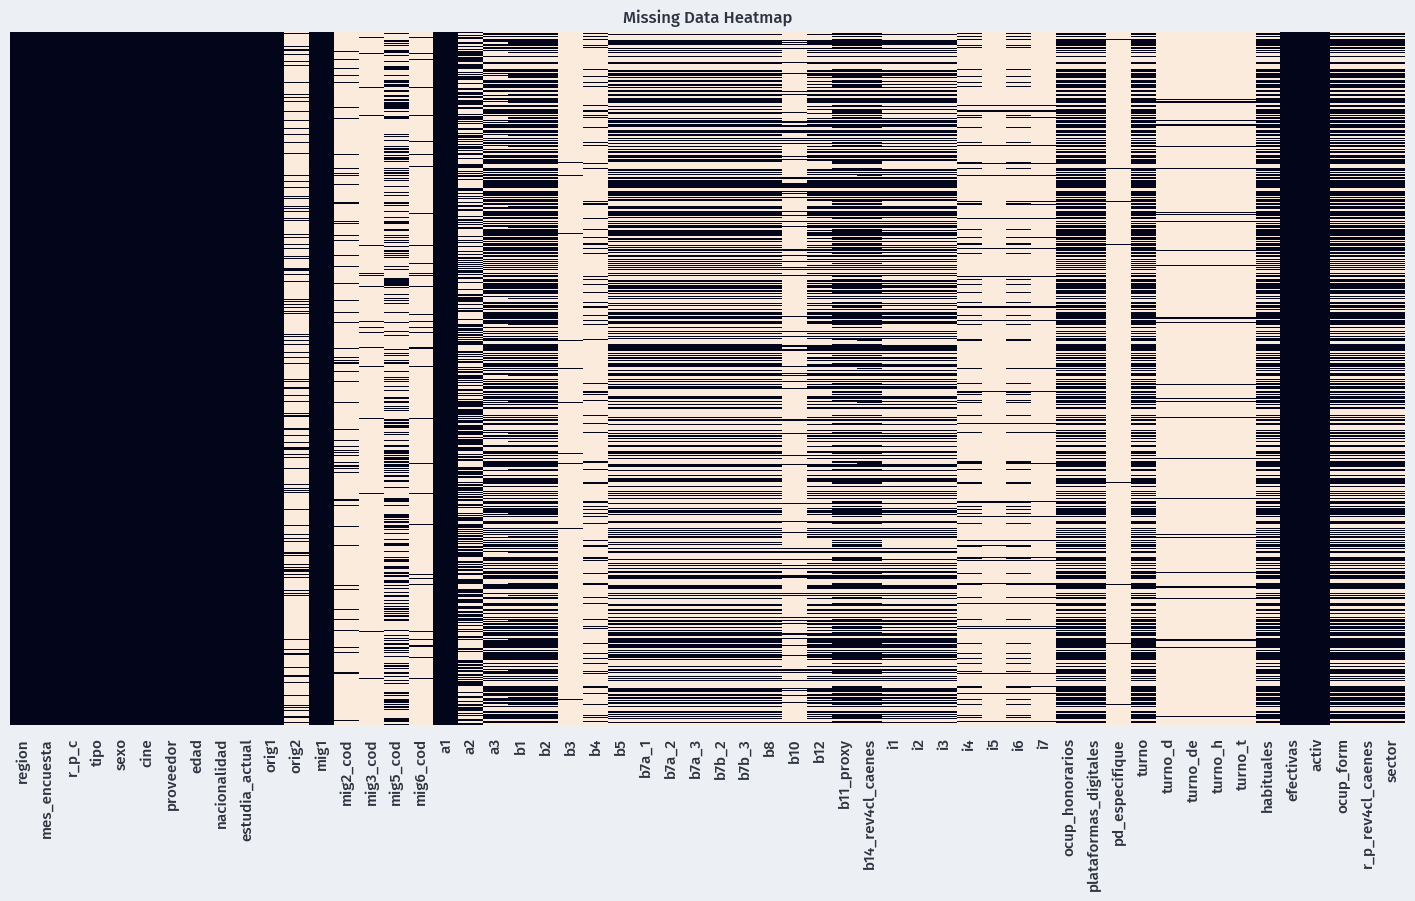

In [28]:
# Se trata de un caso de "Structural Missingness", debido a que los datos faltantes ocurren debido a que son preguntas mutuamente excluyentes.
# Ejemplo, mig1 no contiene datos perdidos, ya que es una pregunta que aplica a todos. Independiente del resultado, se tabula. pero, las otras variables "mig" si tienen valores nulos ya que dependen de la respuesta de mig1. y así ocurre con la mayor parte d elos datos nulos.

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Limpieza de datos nulos e imputacion

In [29]:
# Para asegurar un análisis libre de sesgo por poca información, identificaremos y eliminaremos de 'df' aquellas columnas con más del 60% de valores nulos
nan_counts = data.isna().sum()
n_filas = len(data)
columnas_nulas = []  # Lista para almacenar las columnas con más de 60% de NaN

for columna, na in nan_counts.items():
    umbral = 60
    porcentaje_nan = round(((na / n_filas) * 100), 2)
    if porcentaje_nan >= umbral:
        print(f'Porcentaje de NaN en la columna "{columna}"= {porcentaje_nan}% \n-----Cantidad = {na} -----\n')
        columnas_nulas.append(columna)  # Agregar la columna a la lista

# Verificar las columnas almacenadas en la lista
print(f"Columnas con más del 60% de valores nulos:{columnas_nulas}, \n {len(columnas_nulas)}")

Porcentaje de NaN en la columna "orig2"= 86.23% 
-----Cantidad = 225038 -----

Porcentaje de NaN en la columna "mig2_cod"= 90.7% 
-----Cantidad = 236720 -----

Porcentaje de NaN en la columna "mig3_cod"= 97.7% 
-----Cantidad = 254966 -----

Porcentaje de NaN en la columna "mig5_cod"= 62.6% 
-----Cantidad = 163385 -----

Porcentaje de NaN en la columna "mig6_cod"= 94.28% 
-----Cantidad = 246060 -----

Porcentaje de NaN en la columna "b3"= 98.59% 
-----Cantidad = 257296 -----

Porcentaje de NaN en la columna "b4"= 86.26% 
-----Cantidad = 225129 -----

Porcentaje de NaN en la columna "b10"= 87.56% 
-----Cantidad = 228505 -----

Porcentaje de NaN en la columna "i4"= 85.51% 
-----Cantidad = 223160 -----

Porcentaje de NaN en la columna "i5"= 94.7% 
-----Cantidad = 247141 -----

Porcentaje de NaN en la columna "i6"= 85.51% 
-----Cantidad = 223160 -----

Porcentaje de NaN en la columna "i7"= 94.61% 
-----Cantidad = 246912 -----

Porcentaje de NaN en la columna "pd_especifique"= 98.57% 
-----C

In [30]:
# Eliminar las columnas especificadas en la lista 'columnas_nulas' de 'df'
df = data.drop(columns=columnas_nulas, errors='ignore')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260978 entries, 0 to 260977
Data columns (total 39 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 260978 non-null  int64  
 1   mes_encuesta           260978 non-null  int64  
 2   r_p_c                  260978 non-null  int64  
 3   tipo                   260978 non-null  int64  
 4   sexo                   260978 non-null  int64  
 5   cine                   260978 non-null  int64  
 6   proveedor              260978 non-null  int64  
 7   edad                   260978 non-null  int64  
 8   nacionalidad           260978 non-null  int64  
 9   estudia_actual         260978 non-null  int64  
 10  orig1                  260978 non-null  int64  
 11  mig1                   260978 non-null  int64  
 12  a1                     260978 non-null  float64
 13  a2                     123929 non-null  float64
 14  a3                     141580 non-nu

In [32]:
# List of columns with structural missingness
structural_missing_cols = [
    'a2', 'a3', 'b1', 'b2', 'b5', 'b7a_1', 'b7a_2', 'b7a_3',
    'b7b_2', 'b7b_3', 'b8', 'b12', 'b11_proxy', 'b14_rev4cl_caenes',
    'i1', 'i2', 'i3', 'ocup_honorarios', 'plataformas_digitales', 'turno',
    'r_p_rev4cl_caenes',
]

# Replace NaN with 99 in the specified columns
df[structural_missing_cols] = df[structural_missing_cols].fillna(99)

# Verify the changes
print(df[structural_missing_cols].head())

     a2    a3    b1    b2    b5  b7a_1  b7a_2  b7a_3  b7b_2  b7b_3    b8  \
0  99.0   1.0   5.0   2.0   3.0    1.0    1.0    1.0    1.0    2.0   1.0   
1   2.0  99.0  99.0  99.0  99.0   99.0   99.0   99.0   99.0   99.0  99.0   
2  99.0   1.0   2.0   1.0  99.0   99.0   99.0   99.0   99.0   99.0  99.0   
3  99.0   1.0   7.0   2.0   2.0    2.0    2.0    2.0    2.0    2.0   2.0   
4  99.0   1.0   5.0   2.0   2.0    1.0    1.0    1.0    1.0    1.0   1.0   

    b12  b11_proxy  b14_rev4cl_caenes    i1    i2    i3  ocup_honorarios  \
0  99.0        1.0               20.0  99.0  99.0  99.0              2.0   
1  99.0       99.0               99.0  99.0  99.0  99.0             99.0   
2  99.0        2.0               13.0  99.0  99.0  99.0              2.0   
3   1.0        1.0                3.0   1.0   1.0   1.0              2.0   
4   2.0        1.0               16.0   1.0   1.0   1.0              2.0   

   plataformas_digitales  turno  r_p_rev4cl_caenes  
0                    2.0    2.0  

In [33]:
#Como vimos en la entrega anterior, ocup_form y sector entregan información bastante parecida
df = df.drop(columns=['sector','efectivas'], errors='ignore')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260978 entries, 0 to 260977
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 260978 non-null  int64  
 1   mes_encuesta           260978 non-null  int64  
 2   r_p_c                  260978 non-null  int64  
 3   tipo                   260978 non-null  int64  
 4   sexo                   260978 non-null  int64  
 5   cine                   260978 non-null  int64  
 6   proveedor              260978 non-null  int64  
 7   edad                   260978 non-null  int64  
 8   nacionalidad           260978 non-null  int64  
 9   estudia_actual         260978 non-null  int64  
 10  orig1                  260978 non-null  int64  
 11  mig1                   260978 non-null  int64  
 12  a1                     260978 non-null  float64
 13  a2                     260978 non-null  float64
 14  a3                     260978 non-nu

In [35]:
# Drop rows where 'habituales' is NaN or equals 888 or 999
df = df.dropna(subset=['habituales'])
df = df[~df['habituales'].isin([888, 999])]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152105 entries, 0 to 260977
Data columns (total 37 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 152105 non-null  int64  
 1   mes_encuesta           152105 non-null  int64  
 2   r_p_c                  152105 non-null  int64  
 3   tipo                   152105 non-null  int64  
 4   sexo                   152105 non-null  int64  
 5   cine                   152105 non-null  int64  
 6   proveedor              152105 non-null  int64  
 7   edad                   152105 non-null  int64  
 8   nacionalidad           152105 non-null  int64  
 9   estudia_actual         152105 non-null  int64  
 10  orig1                  152105 non-null  int64  
 11  mig1                   152105 non-null  int64  
 12  a1                     152105 non-null  float64
 13  a2                     152105 non-null  float64
 14  a3                     152105 non-null  f

In [37]:
df = df.drop(columns=['activ'], errors='ignore')

In [38]:
df.head()

,region,mes_encuesta,r_p_c,tipo,sexo,cine,proveedor,edad,nacionalidad,estudia_actual,orig1,mig1,a1,a2,a3,b1,b2,b5,b7a_1,b7a_2,b7a_3,b7b_2,b7b_3,b8,b12,b11_proxy,b14_rev4cl_caenes,i1,i2,i3,ocup_honorarios,plataformas_digitales,turno,habituales,ocup_form,r_p_rev4cl_caenes
0,16,1,16203,1,2,6,0,24,152,2,2,1,1.0,99.0,1.0,5.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,99.0,1.0,20.0,99.0,99.0,99.0,2.0,2.0,2.0,45.0,1.0,20.0
2,5,1,5101,1,1,8,1,58,152,2,2,1,1.0,99.0,1.0,2.0,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,2.0,13.0,99.0,99.0,99.0,2.0,2.0,2.0,42.0,1.0,13.0
3,3,1,3201,1,1,4,1,61,152,2,2,1,1.0,99.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,30.0,2.0,3.0
4,14,1,14201,3,2,5,0,49,152,2,2,1,1.0,99.0,1.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,16.0,1.0,1.0,1.0,2.0,2.0,2.0,45.0,1.0,9.0
6,9,1,9102,1,2,7,0,49,152,2,2,1,1.0,99.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,1.0,1.0,1.0,2.0,2.0,2.0,44.0,1.0,16.0


In [39]:
numeric = ["habituales"]
categoric = [col for col in df.columns if col not in numeric]

In [40]:
df_categoric = df[categoric]
df_categoric = df_categoric.astype("category")
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152105 entries, 0 to 260977
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   region                 152105 non-null  category
 1   mes_encuesta           152105 non-null  category
 2   r_p_c                  152105 non-null  category
 3   tipo                   152105 non-null  category
 4   sexo                   152105 non-null  category
 5   cine                   152105 non-null  category
 6   proveedor              152105 non-null  category
 7   edad                   152105 non-null  category
 8   nacionalidad           152105 non-null  category
 9   estudia_actual         152105 non-null  category
 10  orig1                  152105 non-null  category
 11  mig1                   152105 non-null  category
 12  a1                     152105 non-null  category
 13  a2                     152105 non-null  category
 14  a3                     15

In [41]:
df_categoric.head()

,region,mes_encuesta,r_p_c,tipo,sexo,cine,proveedor,edad,nacionalidad,estudia_actual,orig1,mig1,a1,a2,a3,b1,b2,b5,b7a_1,b7a_2,b7a_3,b7b_2,b7b_3,b8,b12,b11_proxy,b14_rev4cl_caenes,i1,i2,i3,ocup_honorarios,plataformas_digitales,turno,ocup_form,r_p_rev4cl_caenes
0,16,1,16203,1,2,6,0,24,152,2,2,1,1.0,99.0,1.0,5.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,99.0,1.0,20.0,99.0,99.0,99.0,2.0,2.0,2.0,1.0,20.0
2,5,1,5101,1,1,8,1,58,152,2,2,1,1.0,99.0,1.0,2.0,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,2.0,13.0,99.0,99.0,99.0,2.0,2.0,2.0,1.0,13.0
3,3,1,3201,1,1,4,1,61,152,2,2,1,1.0,99.0,1.0,7.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,3.0
4,14,1,14201,3,2,5,0,49,152,2,2,1,1.0,99.0,1.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,16.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,9.0
6,9,1,9102,1,2,7,0,49,152,2,2,1,1.0,99.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,16.0


# matriz de correlaciones (categorica)

In [42]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér's V matrix for all categorical columns
categorical_columns = df_categoric.columns
cramers_v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert the values to float
cramers_v_matrix = cramers_v_matrix.astype(float)


In [43]:
cramers_v_matrix.head()

,region,mes_encuesta,r_p_c,tipo,sexo,cine,proveedor,edad,nacionalidad,estudia_actual,orig1,mig1,a1,a2,a3,b1,b2,b5,b7a_1,b7a_2,b7a_3,b7b_2,b7b_3,b8,b12,b11_proxy,b14_rev4cl_caenes,i1,i2,i3,ocup_honorarios,plataformas_digitales,turno,ocup_form,r_p_rev4cl_caenes
region,1.000000,0.018112,0.998964,0.298344,0.034368,0.073049,0.034097,0.025032,0.082229,0.027517,0.220421,0.073667,0.069510,0.064203,0.050755,0.075009,0.057426,0.085338,0.070498,0.070006,0.075007,0.082926,0.085395,0.076175,0.100653,0.053830,0.105064,0.070160,0.075249,0.068576,0.046535,0.046972,0.113629,0.103889,0.096773
mes_encuesta,0.018112,1.000000,0.073199,0.013222,0.003977,0.008372,0.005377,0.009426,0.009104,0.004845,0.002679,0.012759,0.101472,0.084679,0.084500,0.009972,0.006718,0.005375,0.005721,0.005750,0.006526,0.009154,0.015301,0.006580,0.011987,0.004053,0.010687,0.007387,0.006522,0.011838,0.000581,0.009233,0.002903,0.005301,0.011217
r_p_c,0.998964,0.073199,1.000000,0.599772,0.073403,0.152797,0.063284,0.046047,0.074509,0.065705,0.268243,0.123542,0.089635,0.088449,0.083200,0.143908,0.105805,0.127851,0.111374,0.110841,0.115364,0.123921,0.134368,0.116072,0.149315,0.094629,0.134448,0.112393,0.124159,0.110469,0.089102,0.081112,0.134920,0.167946,0.127172
tipo,0.298344,0.013222,0.599772,0.999980,0.072659,0.246418,0.004148,0.091717,0.095469,0.046244,0.075567,0.062720,0.003042,0.029649,0.048689,0.294140,0.090857,0.100301,0.114608,0.114060,0.094506,0.122452,0.111222,0.111003,0.101090,0.085381,0.373218,0.123375,0.120542,0.118789,0.058926,0.048722,0.025783,0.089946,0.375328
sexo,0.034368,0.003977,0.073403,0.072659,0.999987,0.124546,0.174109,0.069146,0.039975,0.018440,0.012570,0.010399,0.083663,0.084499,0.081734,0.387171,0.039759,0.238169,0.061074,0.059704,0.092784,0.058701,0.064351,0.031720,0.117052,0.038803,0.452863,0.073211,0.076530,0.133562,0.049449,0.047131,0.114833,0.031399,0.449343


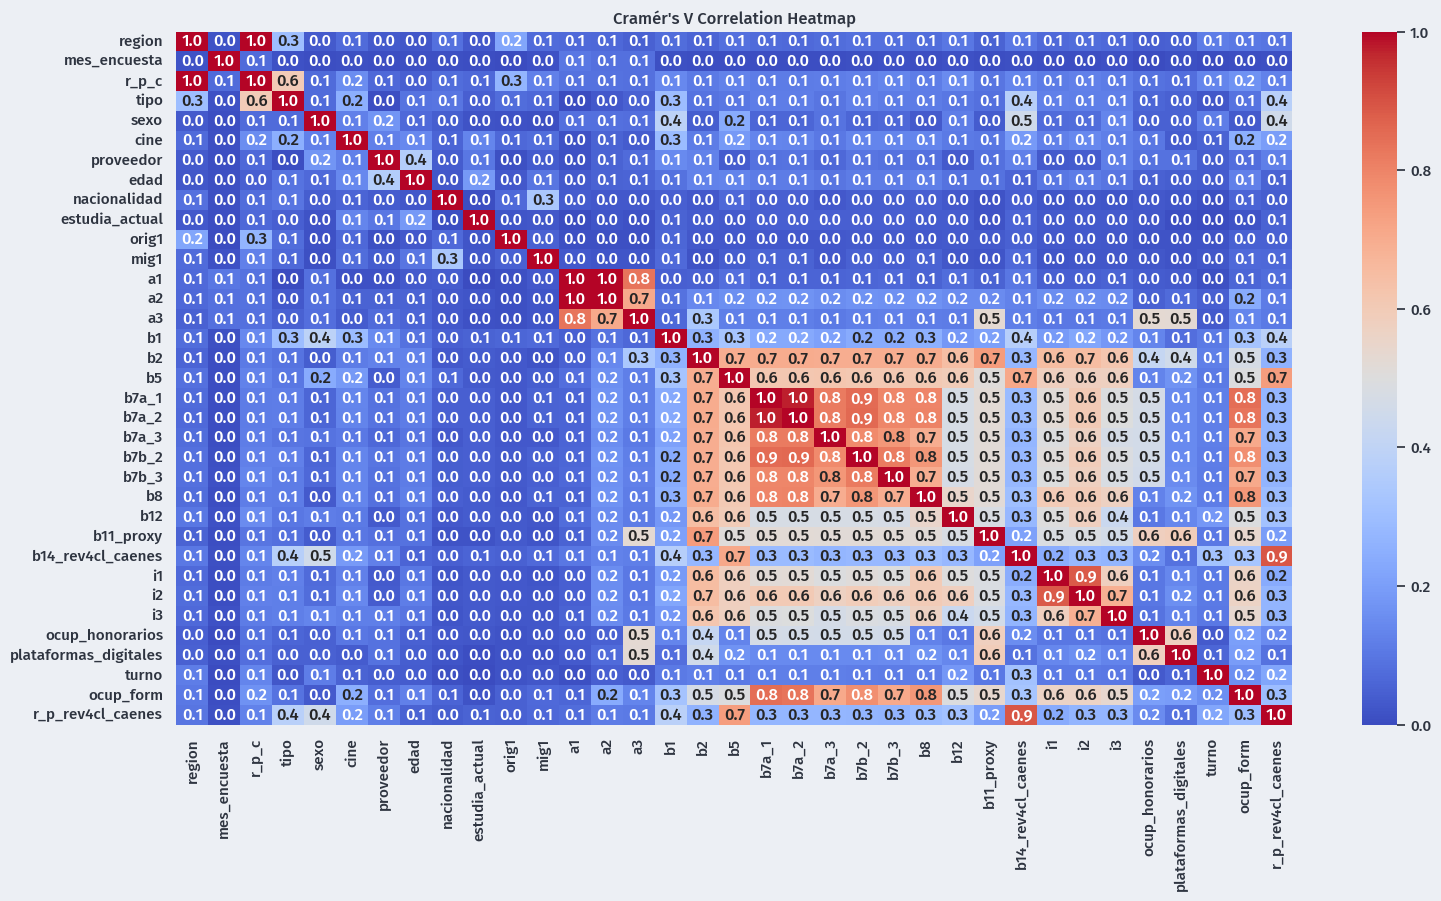

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap

sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt=".1f", cbar=True)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152105 entries, 0 to 260977
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   region                 152105 non-null  int64  
 1   mes_encuesta           152105 non-null  int64  
 2   r_p_c                  152105 non-null  int64  
 3   tipo                   152105 non-null  int64  
 4   sexo                   152105 non-null  int64  
 5   cine                   152105 non-null  int64  
 6   proveedor              152105 non-null  int64  
 7   edad                   152105 non-null  int64  
 8   nacionalidad           152105 non-null  int64  
 9   estudia_actual         152105 non-null  int64  
 10  orig1                  152105 non-null  int64  
 11  mig1                   152105 non-null  int64  
 12  a1                     152105 non-null  float64
 13  a2                     152105 non-null  float64
 14  a3                     152105 non-null  f

In [46]:
df_imputed = df.copy()

In [47]:
df_imputed[categoric] = df_imputed[categoric].astype('category')
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152105 entries, 0 to 260977
Data columns (total 36 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   region                 152105 non-null  category
 1   mes_encuesta           152105 non-null  category
 2   r_p_c                  152105 non-null  category
 3   tipo                   152105 non-null  category
 4   sexo                   152105 non-null  category
 5   cine                   152105 non-null  category
 6   proveedor              152105 non-null  category
 7   edad                   152105 non-null  category
 8   nacionalidad           152105 non-null  category
 9   estudia_actual         152105 non-null  category
 10  orig1                  152105 non-null  category
 11  mig1                   152105 non-null  category
 12  a1                     152105 non-null  category
 13  a2                     152105 non-null  category
 14  a3                     15

# Reduccion de dimensionalidad (FAMD) y preparacion de datos para modelado

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_imputed["habituales"] = scaler.fit_transform(df_imputed[["habituales"]])

In [49]:
! pip install prince

In [50]:
import prince

famd = prince.FAMD(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error"  # same parameter as sklearn.preprocessing.OneHotEncoder
)
famd = famd.fit(df_imputed)

c:\Users\nicot\anaconda3\Lib\site-packages\prince\pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-3.960886227032316, -1.3458752901014652, -0.7176163385097987, -1.138598738454199, -4.011855397237736, -0.32955907580425664, -0.7765971410941263, -1.5476658925619273, -1.4304550454408045, -0.9161987433985499, -1.9158868096817656, -0.7423608080821734, -1.4986050294475615, -1.203395533466366, -1.9044428236860753, -0.26009735883658036, -0.07584593007085705, -3.576535722028748, -2.1346823207445476, -0.06524513606508817, -0.3837534244444229, -3.223657251642283, -1.2077854127973626, -0.8643774357696619, -0.2492551607686068, -0.12135348811337127, -2.1966531735467996, -1.2811453038215304, -0.8372648675891419, -1.2865222663304017, -0.2989907747459598, -0.3678332124041135, -1.1879032086282373, -1.7751512685492128, -1.0083801262150427, -0.8917623731539897, -0.49885638913983543, -0.49060064995047653, -0.3689263298582707, -0.6980298365214338, -0.6889883696681799,

In [51]:
# Print the explained variance ratio for each component
print(famd.eigenvalues_summary)


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0            235.842         2.29%                      2.29%
1            122.398         1.19%                      3.48%
2            106.459         1.03%                      4.51%


In [52]:
famd.row_coordinates(df_imputed).head()

c:\Users\nicot\anaconda3\Lib\site-packages\prince\pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-3.960886227032316, -1.3458752901014652, -0.7176163385097987, -1.138598738454199, -4.011855397237736, -0.32955907580425664, -0.7765971410941263, -1.5476658925619273, -1.4304550454408045, -0.9161987433985499, -1.9158868096817656, -0.7423608080821734, -1.4986050294475615, -1.203395533466366, -1.9044428236860753, -0.26009735883658036, -0.07584593007085705, -3.576535722028748, -2.1346823207445476, -0.06524513606508817, -0.3837534244444229, -3.223657251642283, -1.2077854127973626, -0.8643774357696619, -0.2492551607686068, -0.12135348811337127, -2.1966531735467996, -1.2811453038215304, -0.8372648675891419, -1.2865222663304017, -0.2989907747459598, -0.3678332124041135, -1.1879032086282373, -1.7751512685492128, -1.0083801262150427, -0.8917623731539897, -0.49885638913983543, -0.49060064995047653, -0.3689263298582707, -0.6980298365214338, -0.6889883696681799,

component,0,1,2
0,2.194432,12.896474,-0.951250
2,23.172080,-9.167133,2.078771
3,-2.985018,22.182306,0.762062
4,-9.413582,-1.864136,-4.091266
6,-11.614517,-7.128747,0.521219


In [53]:
famd_coordinates = famd.column_coordinates_
famd_coordinates.head()

component,0,1,2
variable,,,
habituales,0.066755,0.025927,0.010435
a1,0.002229,0.001729,0.000690
a2,0.061275,0.015453,0.001585
a3,0.036014,0.009909,0.001621
b1,0.172468,0.184492,0.077760


In [54]:
import plotly.express as px
import pandas as pd

# Extract variable coordinates and names from FAMD
column_coordinates = famd.column_coordinates_
variable_names = column_coordinates.index.tolist()  # Get variable names
x_coords = column_coordinates[0]  # FAMD Component 1
y_coords = column_coordinates[1]  # FAMD Component 2
z_coords = column_coordinates[2]  # FAMD Component 3 (ensure FAMD computed with 3 components)

# Create a DataFrame for Plotly
plot_data = pd.DataFrame({
    'Variable': variable_names,
    'FAMD Component 1': x_coords,
    'FAMD Component 2': y_coords,
    'FAMD Component 3': z_coords
})

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    plot_data,
    x='FAMD Component 1',
    y='FAMD Component 2',
    z='FAMD Component 3',
    text='Variable',
    title='Interactive 3D FAMD Variable Coordinates',
    labels={
        'FAMD Component 1': 'FAMD Component 1',
        'FAMD Component 2': 'FAMD Component 2',
        'FAMD Component 3': 'FAMD Component 3'
    }
)

# Add hover labels and make text labels interactive
fig.update_traces(marker=dict(size=5, color='blue'), textposition='top center')

# Customize layout for interactivity
fig.update_layout(
    height=1000,
    width=1200,
    hovermode='closest',
    scene=dict(
        xaxis=dict(title='FAMD Component 1', zeroline=False),
        yaxis=dict(title='FAMD Component 2', zeroline=False),
        zaxis=dict(title='FAMD Component 3', zeroline=False)
    )
)

# Show the interactive plot
fig.show()


In [55]:
# observaciones graficadas en los componentes principales
# division lineal o no lineal del dataset
# graficos 3d para juntar variables más comunes
# como se dividen los datos en las variables,

In [56]:
# Re-fit FAMD on the current dataset and re-transform
#famd = famd.fit(df_imputed)
reduced_data = famd.transform(df_imputed)


c:\Users\nicot\anaconda3\Lib\site-packages\prince\pca.py:178: PerformanceWarning:

Concatenating sparse arrays with multiple fill values: '[-3.960886227032316, -1.3458752901014652, -0.7176163385097987, -1.138598738454199, -4.011855397237736, -0.32955907580425664, -0.7765971410941263, -1.5476658925619273, -1.4304550454408045, -0.9161987433985499, -1.9158868096817656, -0.7423608080821734, -1.4986050294475615, -1.203395533466366, -1.9044428236860753, -0.26009735883658036, -0.07584593007085705, -3.576535722028748, -2.1346823207445476, -0.06524513606508817, -0.3837534244444229, -3.223657251642283, -1.2077854127973626, -0.8643774357696619, -0.2492551607686068, -0.12135348811337127, -2.1966531735467996, -1.2811453038215304, -0.8372648675891419, -1.2865222663304017, -0.2989907747459598, -0.3678332124041135, -1.1879032086282373, -1.7751512685492128, -1.0083801262150427, -0.8917623731539897, -0.49885638913983543, -0.49060064995047653, -0.3689263298582707, -0.6980298365214338, -0.6889883696681799

In [57]:
reduced_data.head()

component,0,1,2
0,2.194432,12.896474,-0.951250
2,23.172080,-9.167133,2.078771
3,-2.985018,22.182306,0.762062
4,-9.413582,-1.864136,-4.091266
6,-11.614517,-7.128747,0.521219


In [58]:
# prompt: change 1 to 0 and 2 to 1 in df["ocup_form"]
# 0 FORMAL
# 1 INFORMAL
df_imputed["ocup_form"] = df_imputed["ocup_form"].replace({1.0: 0, 2.0: 1})

C:\Users\nicot\AppData\Local\Temp\ipykernel_21184\667028156.py:4: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



In [59]:
# Add the target variable to the reduced DataFrame
reduced_data['Target'] = df_imputed['ocup_form']

In [60]:
reduced_data.head()

component,0,1,2,Target
0,2.194432,12.896474,-0.951250,0.0
2,23.172080,-9.167133,2.078771,0.0
3,-2.985018,22.182306,0.762062,1.0
4,-9.413582,-1.864136,-4.091266,0.0
6,-11.614517,-7.128747,0.521219,0.0


In [61]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152105 entries, 0 to 260977
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   0       152105 non-null  float64 
 1   1       152105 non-null  float64 
 2   2       152105 non-null  float64 
 3   Target  152105 non-null  category
dtypes: category(1), float64(3)
memory usage: 4.8 MB


# Varios modelos, hiperparametros predeterminados


Cantidad de NaN en la variable "ocup_form": 0.0%


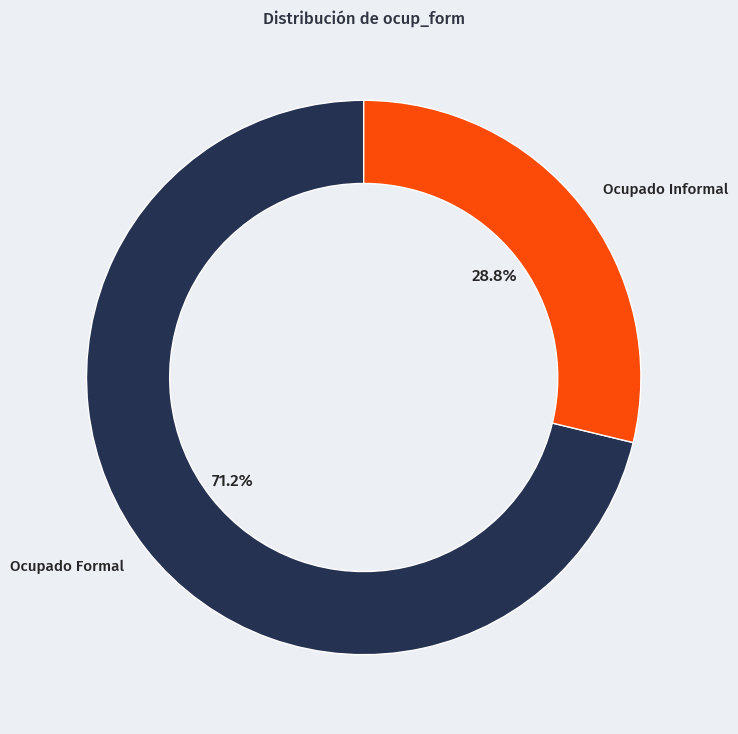

In [62]:
# Contar los valores de la columna 'ocup_form'
ocup_form_counts = df['ocup_form'].value_counts()
nan = df['ocup_form'].isna().sum()
total = len(df)
porcentaje_na_form = round((nan/total)*100,2)
print(f'Cantidad de NaN en la variable "ocup_form": {porcentaje_na_form}%')
# Crear un diccionario para mapear los valores a etiquetas personalizadas
labels_map = {1: "Ocupado Formal", 2: "Ocupado Informal"}
labels = [labels_map.get(key, key) for key in ocup_form_counts.index]


# Asignar colores en el orden de los valores de ocup_form_counts
colors = [palette[label] for label in labels]

# Crear el gráfico de dona
plt.pie(
    ocup_form_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,  # Usar los colores definidos en palette
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# Agregar un título
plt.title('Distribución de ocup_form')
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

# Split the data
X = df_imputed.drop(columns=['ocup_form'])
y = df_imputed['ocup_form']
# Entrenamiento = 70%
# Prueba = 30%
# Estratificado en y, ya que está desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106473 entries, 119113 to 27221
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   region                 106473 non-null  category
 1   mes_encuesta           106473 non-null  category
 2   r_p_c                  106473 non-null  category
 3   tipo                   106473 non-null  category
 4   sexo                   106473 non-null  category
 5   cine                   106473 non-null  category
 6   proveedor              106473 non-null  category
 7   edad                   106473 non-null  category
 8   nacionalidad           106473 non-null  category
 9   estudia_actual         106473 non-null  category
 10  orig1                  106473 non-null  category
 11  mig1                   106473 non-null  category
 12  a1                     106473 non-null  category
 13  a2                     106473 non-null  category
 14  a3                   

In [65]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45632 entries, 53484 to 234126
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   region                 45632 non-null  category
 1   mes_encuesta           45632 non-null  category
 2   r_p_c                  45632 non-null  category
 3   tipo                   45632 non-null  category
 4   sexo                   45632 non-null  category
 5   cine                   45632 non-null  category
 6   proveedor              45632 non-null  category
 7   edad                   45632 non-null  category
 8   nacionalidad           45632 non-null  category
 9   estudia_actual         45632 non-null  category
 10  orig1                  45632 non-null  category
 11  mig1                   45632 non-null  category
 12  a1                     45632 non-null  category
 13  a2                     45632 non-null  category
 14  a3                     45632 non-null 

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# HACER DUMMIES

# Train Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_logreg = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
logreg_report = classification_report(y_test, y_pred_logreg, output_dict=True)
logreg_roc_auc = roc_auc_score(y_test, y_prob_logreg)


c:\Users\nicot\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [67]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluate Decision Tree
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)
dt_roc_auc = roc_auc_score(y_test, y_prob_dt)


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions and probabilities
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_roc_auc = roc_auc_score(y_test, y_prob_rf)


In [69]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss',enable_categorical=True)
xgb_model.fit(X_train, y_train)


# Predictions and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
xgb_report = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_roc_auc = roc_auc_score(y_test, y_prob_xgb)


In [70]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize and train the model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

# Predictions
y_pred_brf = brf.predict(X_test)
y_prob_brf = brf.predict_proba(X_test)[:, 1]

# Generate the classification report as a dictionary
brf_report = classification_report(y_test, y_pred_brf, output_dict=True)

# Compute ROC-AUC
brf_roc_auc = roc_auc_score(y_test, y_prob_brf)

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning:

The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.



In [71]:
import pandas as pd

# Add BRF results to the workflow
results = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Decision Tree',
        'Random Forest',
        'XGBoost',
        'Balanced Random Forest'
    ],
    'Accuracy': [
        logreg_report['accuracy'],
        dt_report['accuracy'],
        rf_report['accuracy'],
        xgb_report['accuracy'],
        brf_report['accuracy']
    ],
    'ROC-AUC': [
        logreg_roc_auc,
        dt_roc_auc,
        rf_roc_auc,
        xgb_roc_auc,
        brf_roc_auc
    ],
    'Precision': [
        logreg_report['1.0']['precision'],
        dt_report['1.0']['precision'],
        rf_report['1.0']['precision'],
        xgb_report['1.0']['precision'],
        brf_report['1.0']['precision']
    ],
    'Recall': [
        logreg_report['1.0']['recall'],
        dt_report['1.0']['recall'],
        rf_report['1.0']['recall'],
        xgb_report['1.0']['recall'],
        brf_report['1.0']['recall']
    ],
    'F1-Score': [
        logreg_report['1.0']['f1-score'],
        dt_report['1.0']['f1-score'],
        rf_report['1.0']['f1-score'],
        xgb_report['1.0']['f1-score'],
        brf_report['1.0']['f1-score']
    ]
})

# Display the comparison DataFrame
results

,Model,Accuracy,ROC-AUC,Precision,Recall,F1-Score
0,Logistic Regression,0.824356,0.865394,0.677668,0.742859,0.708768
1,Decision Tree,0.951109,0.987770,0.887940,0.949958,0.917902
2,Random Forest,0.964521,0.994237,0.920626,0.959403,0.939614
3,XGBoost,0.964499,0.994386,0.925094,0.953843,0.939248
4,Balanced Random Forest,0.957157,0.993921,0.878369,0.987889,0.929916


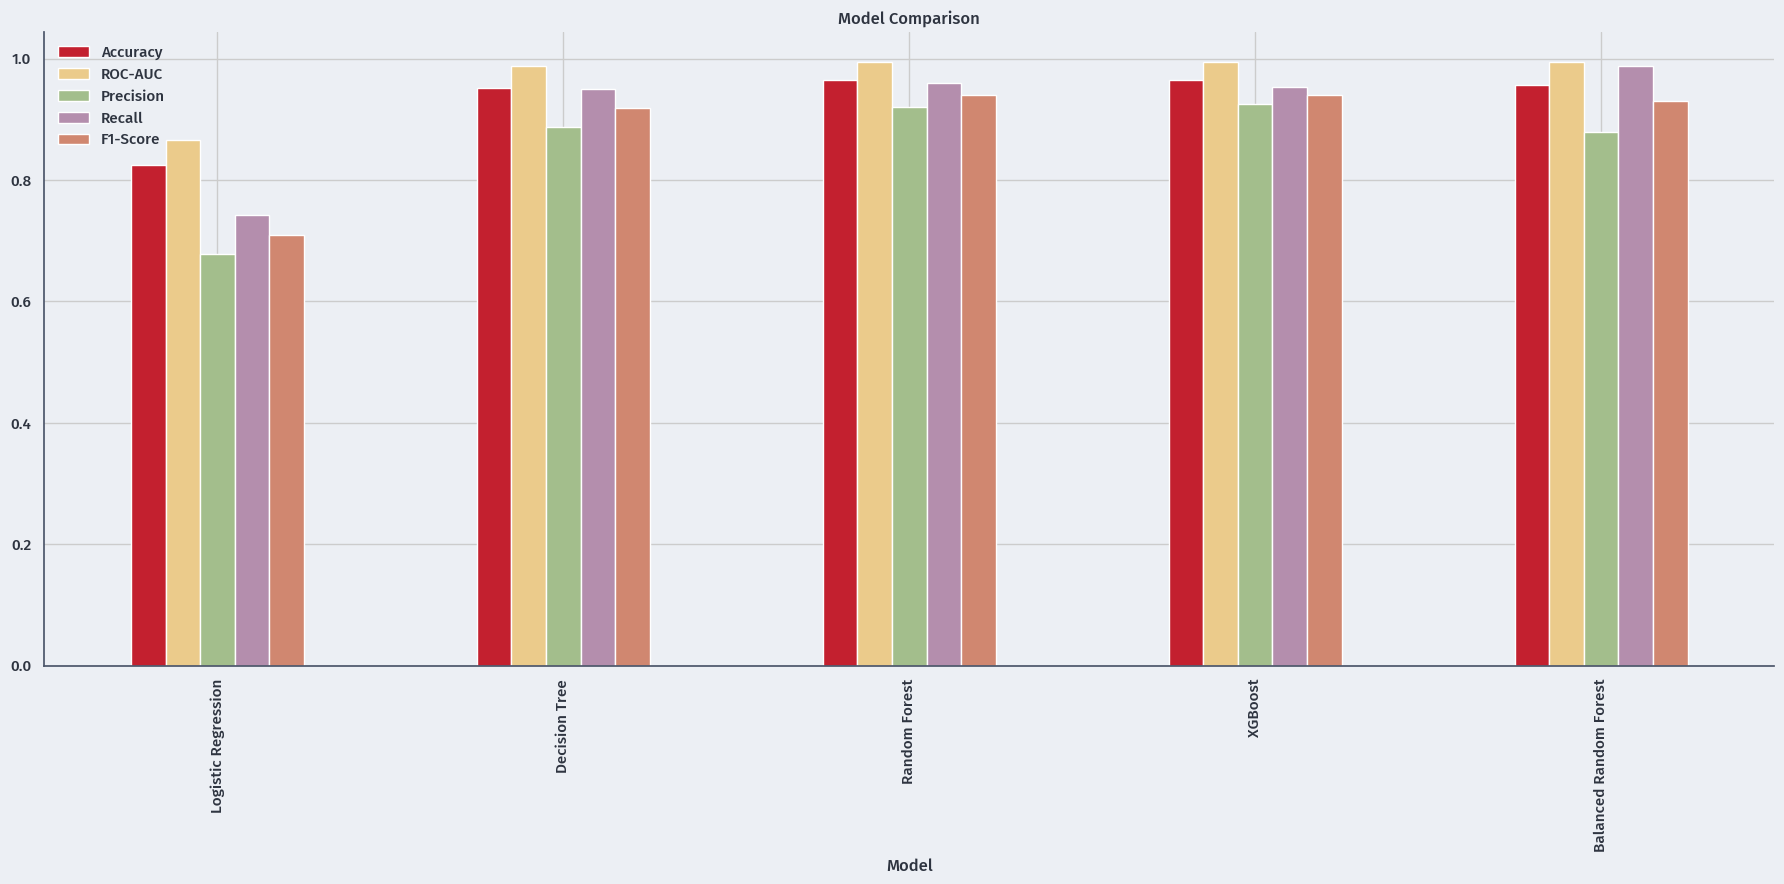

In [72]:
import matplotlib.pyplot as plt

# Nord Aurora color palette
nord_aurora_colors = {
    'accent1': '#C3202F',      # Intense red
    'accent2': '#EBCB8B',      # Aurora yellow
    'accent3': '#A3BE8C',      # Aurora green
    'accent4': '#B48EAD',      # Aurora purple
    'accent5': "#d08770"       # Orange
}

# Assign colors to metrics in the bar plot
custom_colors = [
    nord_aurora_colors['accent1'],  # Red for Accuracy
    nord_aurora_colors['accent2'],  # Yellow for ROC-AUC
    nord_aurora_colors['accent3'],  # Green for Precision
    nord_aurora_colors['accent4'],  # Purple for Recall
    nord_aurora_colors['accent5'],  # orange for F1-Score
]

# Plot comparison of metrics
results.plot(
    x='Model',
    kind='bar',
    title='Model Comparison',
    color=custom_colors,
    legend=True
)

# Customize plot aesthetics
plt.tight_layout()

# Show the plot
plt.show()

# Hiperparametros para Balanced RFC


Usaremos Optuna, una librería que usa estadística bayesiana para obtener los hiperparametros

In [73]:
# import optuna
# from imblearn.ensemble import BalancedRandomForestClassifier
# from sklearn.metrics import f1_score, recall_score
# from sklearn.model_selection import train_test_split

# # Define the objective function for Bayesian Optimization
# def objective(trial):
#     # Hiperparámetros con rangos ajustados para reducir el sobreajuste
#     n_estimators = trial.suggest_int('n_estimators', 10, 100)  # Limitar el número de árboles
#     max_depth = trial.suggest_int('max_depth', 3, 15)  # Limitar la profundidad máxima
#     min_samples_split = trial.suggest_int('min_samples_split', 5, 20)  # Aumentar el mínimo para dividir nodos
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)  # Mayor mínimo en nodos hoja
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])  # Evitar None para regularización

#     # Inicializar el modelo con los hiperparámetros sugeridos
#     brf = BalancedRandomForestClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         max_features=max_features,
#         random_state=42
#     )

#     # Entrenar el modelo
#     brf.fit(X_train, y_train)
#     y_pred = brf.predict(X_test)

#     # Calcular F1-Score y Recall
#     f1 = f1_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)

#     # Combinar métricas para optimizar F1-Score y Recall
#     score = 0.5 * f1 + 0.5 * recall  # Promedio ponderado de F1-Score y Recall
#     return score

# # Crear el estudio de Optuna
# study = optuna.create_study(direction='maximize', study_name="BRF Hyperparameter Optimization - Anti-Overfitting")
# study.optimize(objective, n_trials=50, timeout=1800)  # 50 pruebas o 30 minutos

# # Mostrar los mejores parámetros y puntaje
# print("Best Hyperparameters:", study.best_params)
# print("Best Combined Score (F1 & Recall):", study.best_value)

# Curva de sensibilidad de parametros
# variar el n de estimadores (de 10, 50, 75) etc y ver como van variando
# variar la profundidad de los arboles
# min leaf: menores valores tienden a sobreajustar (en teoria)



In [74]:
#3 minutos 25 seg

# [I 2024-12-08 19:04:18,940] Trial 49 finished with value: 0.9568480161708328 and parameters: {'n_estimators': 53, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 9 with value: 0.9578535411449303.
# Best Hyperparameters: {'n_estimators': 96, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
# Best Combined Score (F1 & Recall): 0.9578535411449303

In [75]:
best_params= {'n_estimators': 96, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

In [76]:
# Train the model with the best parameters
#best_params = study.best_params
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import train_test_split

brf_optimized = BalancedRandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

brf_optimized.fit(X_train, y_train)

# Predictions
y_pred_optimized = brf_optimized.predict(X_test)

# Evaluate the optimized model
optimized_f1 = f1_score(y_test, y_pred_optimized)
optimized_recall = recall_score(y_test, y_pred_optimized)
print("Optimized F1-Score:", optimized_f1)
print("Optimized Recall:", optimized_recall)


c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning:

The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.



Optimized F1-Score: 0.9237808122007448
Optimized Recall: 0.9919262700891157


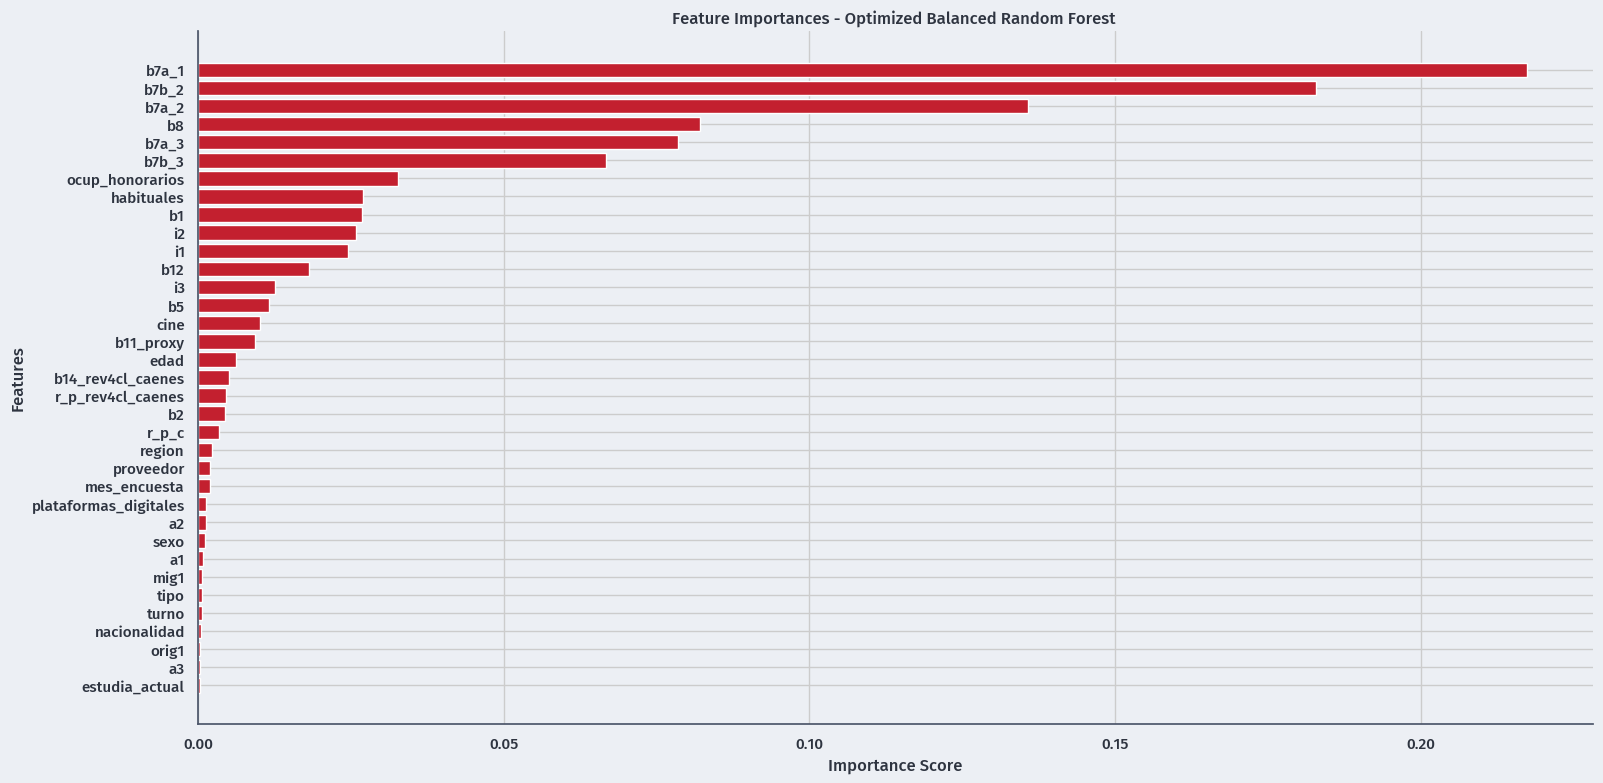

In [77]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = brf_optimized.feature_importances_
sorted_idx = feature_importances.argsort()

# Plot Feature Importance
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importances - Optimized Balanced Random Forest ")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

<table>
  <tr>
    <th style="color: #ECEFF4;">Variable</th>
    <th style="color: #ECEFF4;">Descripción</th>
    <th style="color: #ECEFF4;">Categorías observadas</th>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7a_1</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema previsional o de pensión?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7a_2</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema de salud (público o privado)?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b8</td>
    <td style="color: #ECEFF4;">En ese empleo, ¿tiene contrato escrito?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7b_2</td>
    <td style="color: #ECEFF4;">En este trabajo, ¿tiene derecho, aunque no utilice, a días pagados por enfermedad?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">plataformas_digitales</td>
    <td style="color: #ECEFF4;">¿Su trabajo lo realiza a través de una aplicación móvil o plataforma web?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
    <tr>
    <td style="color: #ECEFF4;">sector</td>
    <td style="color: #ECEFF4;">Ocupados según sector</td>
    <td style="color: #ECEFF4;">1 Formal<br>2 Informal<br>3 Sector hogares como empleadores<br>999 Sin clasificación</td>
  </tr>
</table>

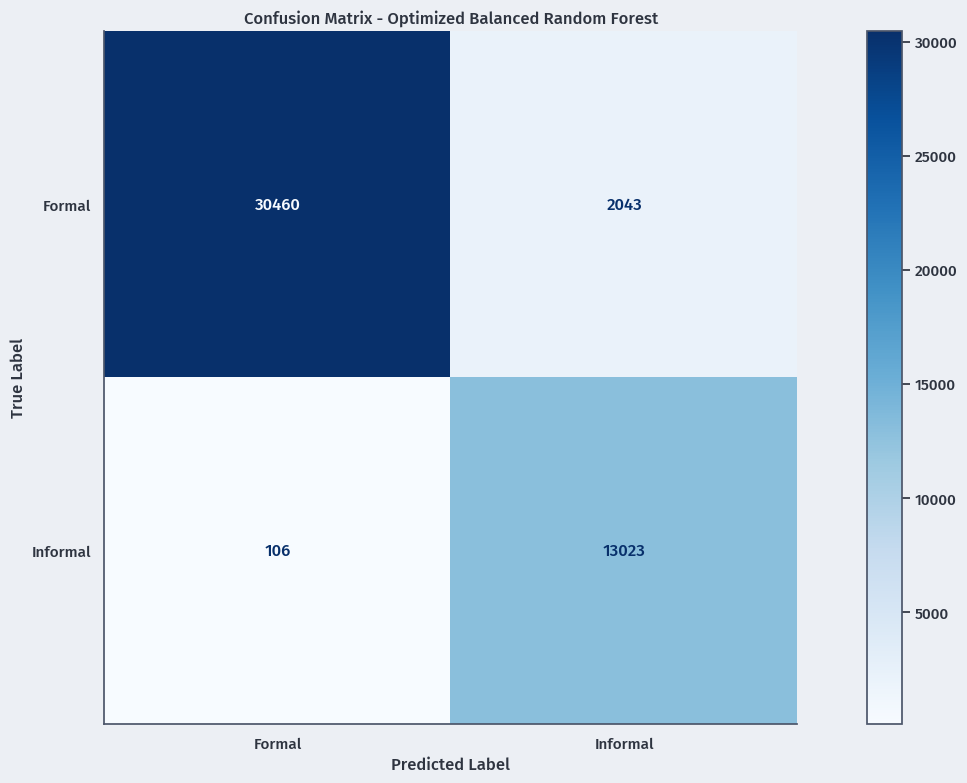

In [78]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Define custom labels
custom_labels = ["Formal", "Informal"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=custom_labels)
disp.plot(cmap='Blues', values_format='d')

# Customize the plot
plt.title("Confusion Matrix - Optimized Balanced Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)
plt.show()


# Hiperparametros para XGB

In [79]:
# import optuna
# from xgboost import XGBClassifier
# from sklearn.metrics import f1_score, recall_score
# from sklearn.model_selection import train_test_split

# # Define the objective function
# def objective(trial):
#     # Hyperparameter search space
#     param = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 100),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 10.0),  # For imbalanced datasets
#     }

#     # Train the XGBoost classifier with the suggested hyperparameters
#     xgb_model = XGBClassifier(
#         random_state=42,
#         eval_metric='logloss',
#         enable_categorical=True,
#         **param
#     )
#     xgb_model.fit(X_train, y_train)

#     # Predictions
#     y_pred = xgb_model.predict(X_test)

#     # Calculate F1-Score and Recall
#     f1 = f1_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)

#     # Combine metrics to optimize F1-Score and Recall
#     score = 0.5 * f1 + 0.5 * recall  # Weighted average of F1 and Recall
#     return score

# # Create and run the study
# study = optuna.create_study(direction='maximize', study_name="XGB Hyperparameter Optimization")
# study.optimize(objective, n_trials=50, timeout=1800)  # 50 trials or 30 minutes

# # Best hyperparameters and score
# print("Best Hyperparameters:", study.best_params)
# print("Best F1-Recall Combined Score:", study.best_value)


In [80]:
#1 min
# Best Hyperparameters: {'n_estimators': 81, 'max_depth': 10, 'learning_rate': 0.17079831985847332, 'colsample_bytree': 0.534385557141224, 'subsample': 0.8890160044204019, 'min_child_weight': 2, 'gamma': 1.1336434170844873, 'scale_pos_weight': 7.656031763335392}
# Best F1-Recall Combined Score: 0.9610963337827532

In [81]:
best_params_xgb = {'n_estimators': 81, 'max_depth': 10, 'learning_rate': 0.17079831985847332, 'colsample_bytree': 0.534385557141224,
               'subsample': 0.8890160044204019, 'min_child_weight': 2, 'gamma': 1.1336434170844873, 'scale_pos_weight': 7.656031763335392}


In [82]:
xgb_optimized = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    enable_categorical=True,
    **best_params_xgb
)
xgb_optimized.fit(X_train, y_train)

# Predictions
y_pred_optimized = xgb_optimized.predict(X_test)
y_prob_optimized = xgb_optimized.predict_proba(X_test)[:, 1]

# Evaluate the optimized model
optimized_f1 = f1_score(y_test, y_pred_optimized)
optimized_recall = recall_score(y_test, y_pred_optimized)

print("Optimized F1-Score:", optimized_f1)
print("Optimized Recall:", optimized_recall)


Optimized F1-Score: 0.935064935064935
Optimized Recall: 0.9871277325005713


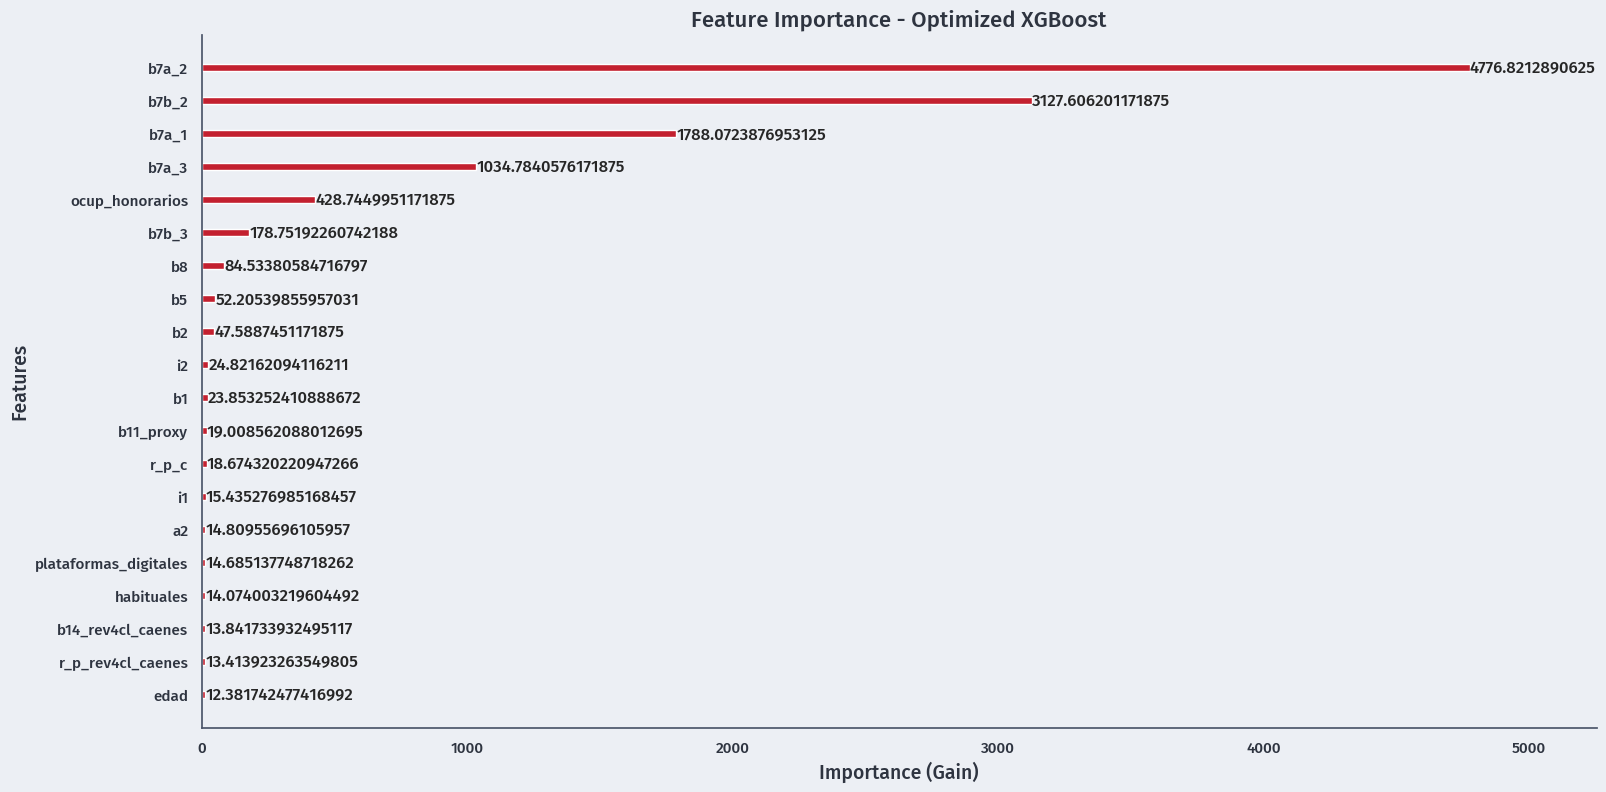

In [83]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance for the optimized XGBoost model

plot_importance(xgb_optimized, max_num_features=20, importance_type='gain', show_values=True)

# Customize the plot
plt.title("Feature Importance - Optimized XGBoost", fontsize=16)
plt.xlabel("Importance (Gain)", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(False)
plt.show()


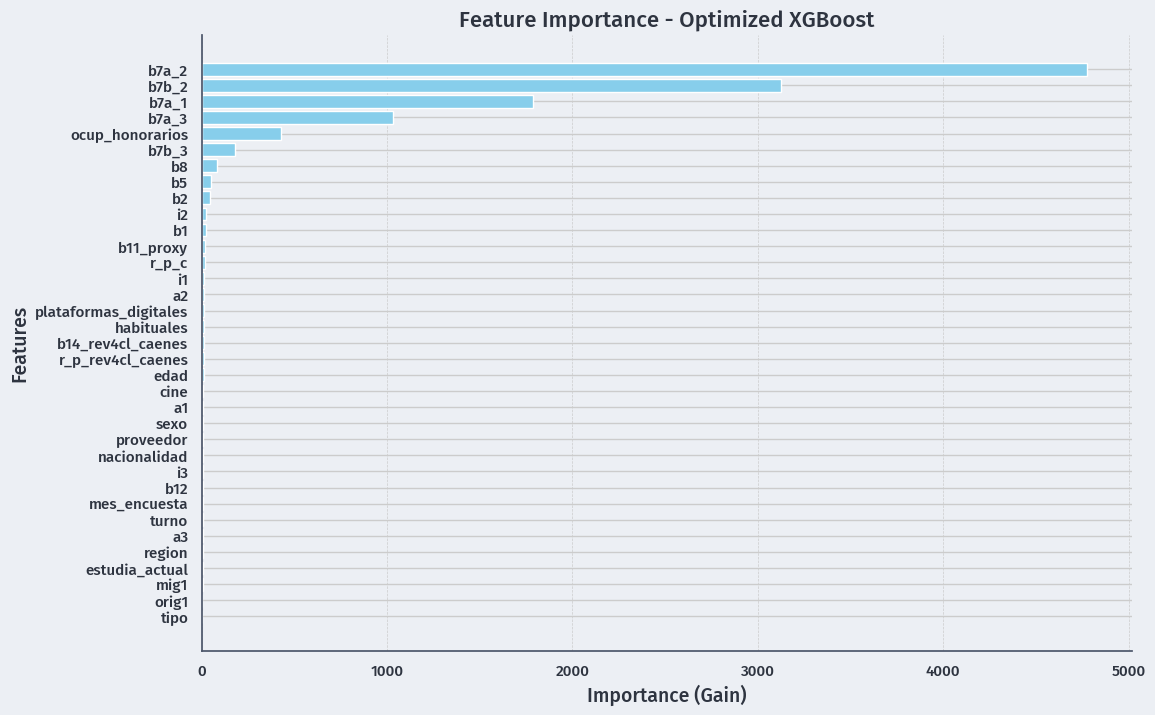

In [84]:
# Extract feature importances
feature_importance = xgb_optimized.get_booster().get_score(importance_type='gain')
feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Convert to a DataFrame for easy plotting
import pandas as pd
importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])

# Plot as a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title("Feature Importance - Optimized XGBoost", fontsize=16)
plt.xlabel("Importance (Gain)", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(axis='x', linestyle='--', linewidth=0.5)
plt.show()


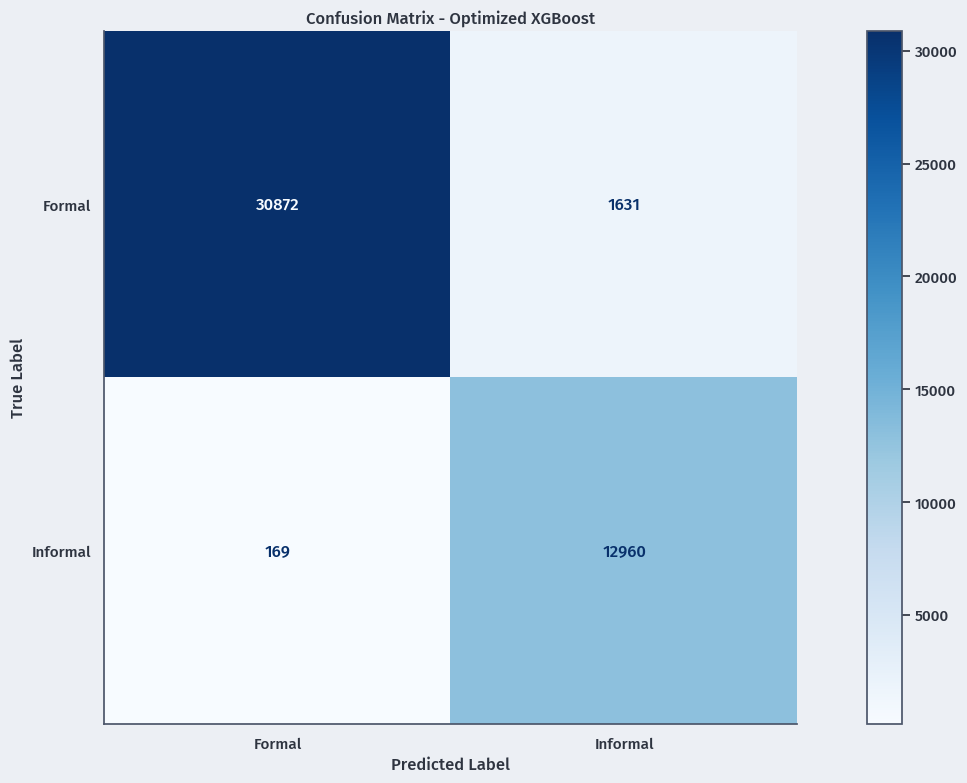

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

# Define custom labels for the target variable
labels = ["Formal", "Informal"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues', values_format='d')

# Customize the plot
plt.title("Confusion Matrix - Optimized XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.grid(False)  # Remove grid for cleaner appearance
plt.show()


In [86]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_fscore_support

# Predictions and probabilities
y_pred_xgb = xgb_optimized.predict(X_test)
y_prob_xgb = xgb_optimized.predict_proba(X_test)[:, 1]

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_xgb)

# Classification report
class_report = classification_report(y_test, y_pred_xgb, target_names=["Formal", "Informal"])

# Detailed precision, recall, F1-score, and support for each class
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_xgb, average='binary', pos_label=1)

# Print performance metrics
print("Performance Metrics for Optimized XGBoost:")
print("--------------------------------------------------")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"ROC-AUC Score: {roc_auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print("--------------------------------------------------")
print("Classification Report:")
print(class_report)


Performance Metrics for Optimized XGBoost:
--------------------------------------------------
Confusion Matrix:
[[30872  1631]
 [  169 12960]]
ROC-AUC Score: 0.995
Precision: 0.888
Recall: 0.987
F1-Score: 0.935
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

      Formal       0.99      0.95      0.97     32503
    Informal       0.89      0.99      0.94     13129

    accuracy                           0.96     45632
   macro avg       0.94      0.97      0.95     45632
weighted avg       0.96      0.96      0.96     45632



# Enfoque iterativo, quitar features muy obvias


In [87]:
from sklearn.model_selection import train_test_split

# Split the data
X = df_imputed.drop(columns=['ocup_form',
'b7a_1',
'b7a_2',
'b7a_3',
'b7b_2',
'b7b_3',
'b8'])
y = df_imputed['ocup_form']
# Entrenamiento = 30%
# Prueba = 70%
# Estratificado en y, ya que está desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

<table>
  <tr>
    <th style="color: #ECEFF4;">Variable</th>
    <th style="color: #ECEFF4;">Descripción</th>
    <th style="color: #ECEFF4;">Categorías observadas</th>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7a_1</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema previsional o de pensión?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7a_2</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema de salud (público o privado)?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
    <tr>
    <td style="color: #ECEFF4;">b7a_3</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema de seguro de desempleo?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b8</td>
    <td style="color: #ECEFF4;">En ese empleo, ¿tiene contrato escrito?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7b_2</td>
    <td style="color: #ECEFF4;">En este trabajo, ¿tiene derecho, aunque no utilice, a días pagados por enfermedad?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
    <tr>
    <td style="color: #ECEFF4;">b7b_3</td>
    <td style="color: #ECEFF4;">En este trabajo, ¿tiene derecho, aunque no lo utilice, a permiso por maternidad o paternidad?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
</table>

In [88]:
print(best_params_xgb)

{'n_estimators': 81, 'max_depth': 10, 'learning_rate': 0.17079831985847332, 'colsample_bytree': 0.534385557141224, 'subsample': 0.8890160044204019, 'min_child_weight': 2, 'gamma': 1.1336434170844873, 'scale_pos_weight': 7.656031763335392}


In [89]:
# XGBOOST
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
xgb_optimized = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    enable_categorical=True,
    **best_params_xgb
)
xgb_optimized.fit(X_train, y_train)

# Predictions
y_pred_optimized_xgb = xgb_optimized.predict(X_test)
y_prob_optimized_xgb = xgb_optimized.predict_proba(X_test)[:, 1]

# Evaluate the optimized model
optimized_f1_XGB = f1_score(y_test, y_pred_optimized_xgb)
optimized_recall_XGB = recall_score(y_test, y_pred_optimized_xgb)
optimized_precision_XGB = precision_score(y_test, y_pred_optimized_xgb)

# Store metrics in a dictionary
metrics_XGB = {
    "Metric": ["F1 Score XGB", "Recall XGB", "Precision XGB"],
    "Value": [optimized_f1_XGB, optimized_recall_XGB, optimized_precision_XGB]
}

print("Optimized F1-Score:", optimized_f1_XGB)
print("Optimized Recall:", optimized_recall_XGB)
print("Optimized Precision:", optimized_precision_XGB)

Optimized F1-Score: 0.8359858225033011
Optimized Recall: 0.9162160103587478
Optimized Precision: 0.7686753147165953


In [90]:
metrics_XGB

{'Metric': ['F1 Score XGB', 'Recall XGB', 'Precision XGB'],
 'Value': [0.8359858225033011, 0.9162160103587478, 0.7686753147165953]}

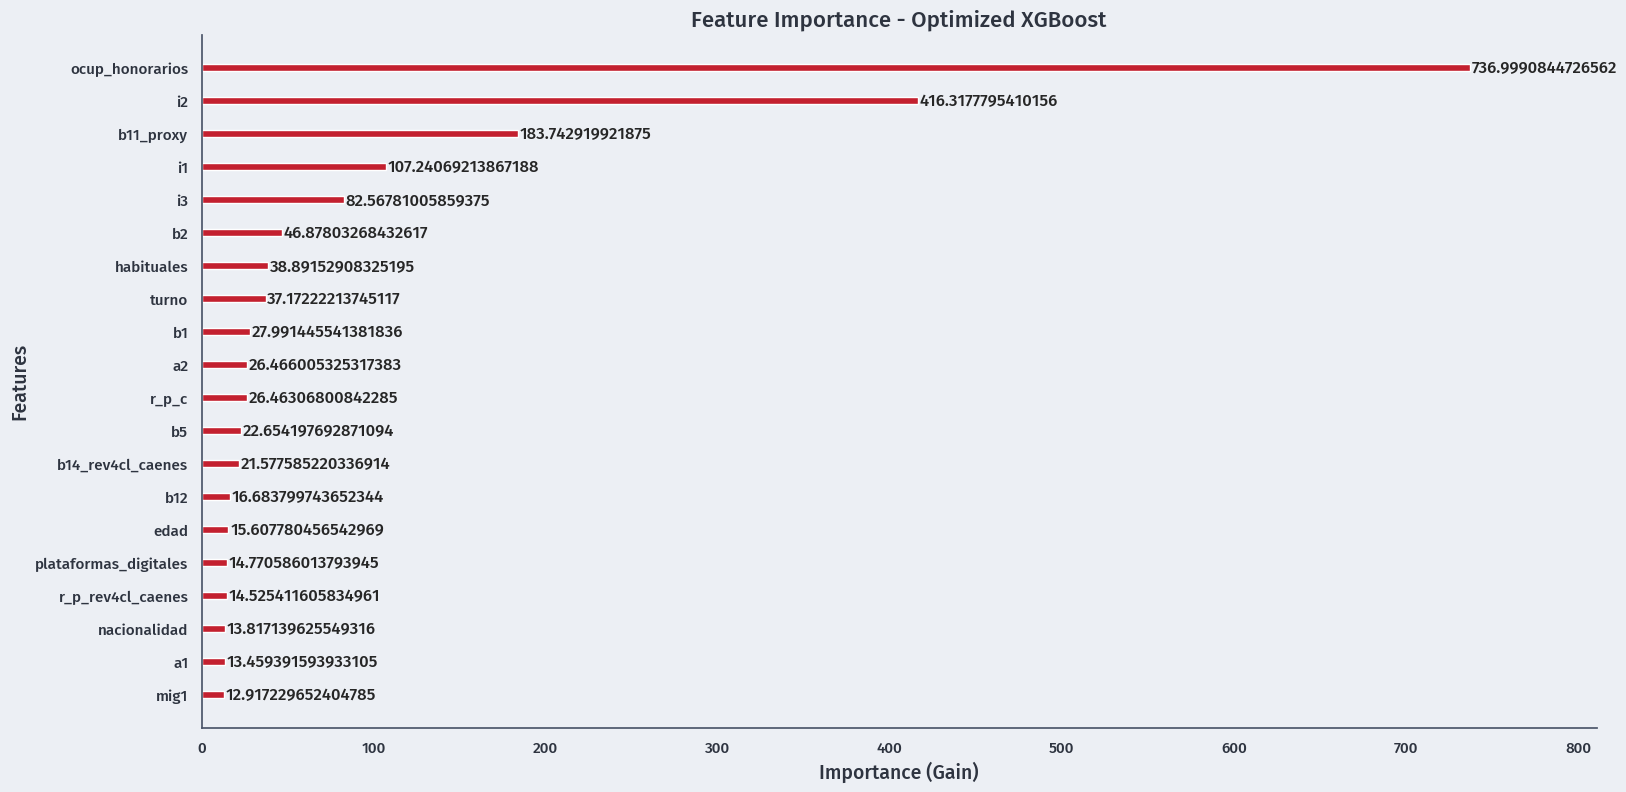

In [91]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance for the optimized XGBoost model

plot_importance(xgb_optimized, max_num_features=20, importance_type='gain', show_values=True)

# Customize the plot
plt.title("Feature Importance - Optimized XGBoost", fontsize=16)
plt.xlabel("Importance (Gain)", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(False)
plt.show()


In [92]:
print(best_params)

{'n_estimators': 96, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


In [93]:
# Train the model with the best parameters
#best_params = study.best_params
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

brf_optimized = BalancedRandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

brf_optimized.fit(X_train, y_train)

# Predictions
y_pred_optimized_brfc = brf_optimized.predict(X_test)
y_prob_optimized_brfc = brf_optimized.predict_proba(X_test)[:, 1]

# Evaluate the optimized model
optimized_f1_BRFC = f1_score(y_test, y_pred_optimized_brfc)
optimized_recall_BRFC = recall_score(y_test, y_pred_optimized_brfc)
optimized_precision_BRFC = precision_score(y_test, y_pred_optimized_brfc)

# Store metrics in a dictionary
metrics_BRFC = {
    "Metric": ["F1 Score BRFC", "Recall BRFC", "Precision BRFC"],
    "Value": [optimized_f1_BRFC, optimized_recall_BRFC, optimized_precision_BRFC]
}

# Print the metrics
print("Optimized F1-Score (BRFC):", optimized_f1_BRFC)
print("Optimized Recall (BRFC):", optimized_recall_BRFC)
print("Optimized Precision (BRFC):", optimized_precision_BRFC)

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning:

The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning:

The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.

c:\Users\nicot\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning:

The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.



Optimized F1-Score (BRFC): 0.835579898282178
Optimized Recall (BRFC): 0.8947368421052632
Optimized Precision (BRFC): 0.7837603416066187


In [94]:
metrics_BRFC

{'Metric': ['F1 Score BRFC', 'Recall BRFC', 'Precision BRFC'],
 'Value': [0.835579898282178, 0.8947368421052632, 0.7837603416066187]}

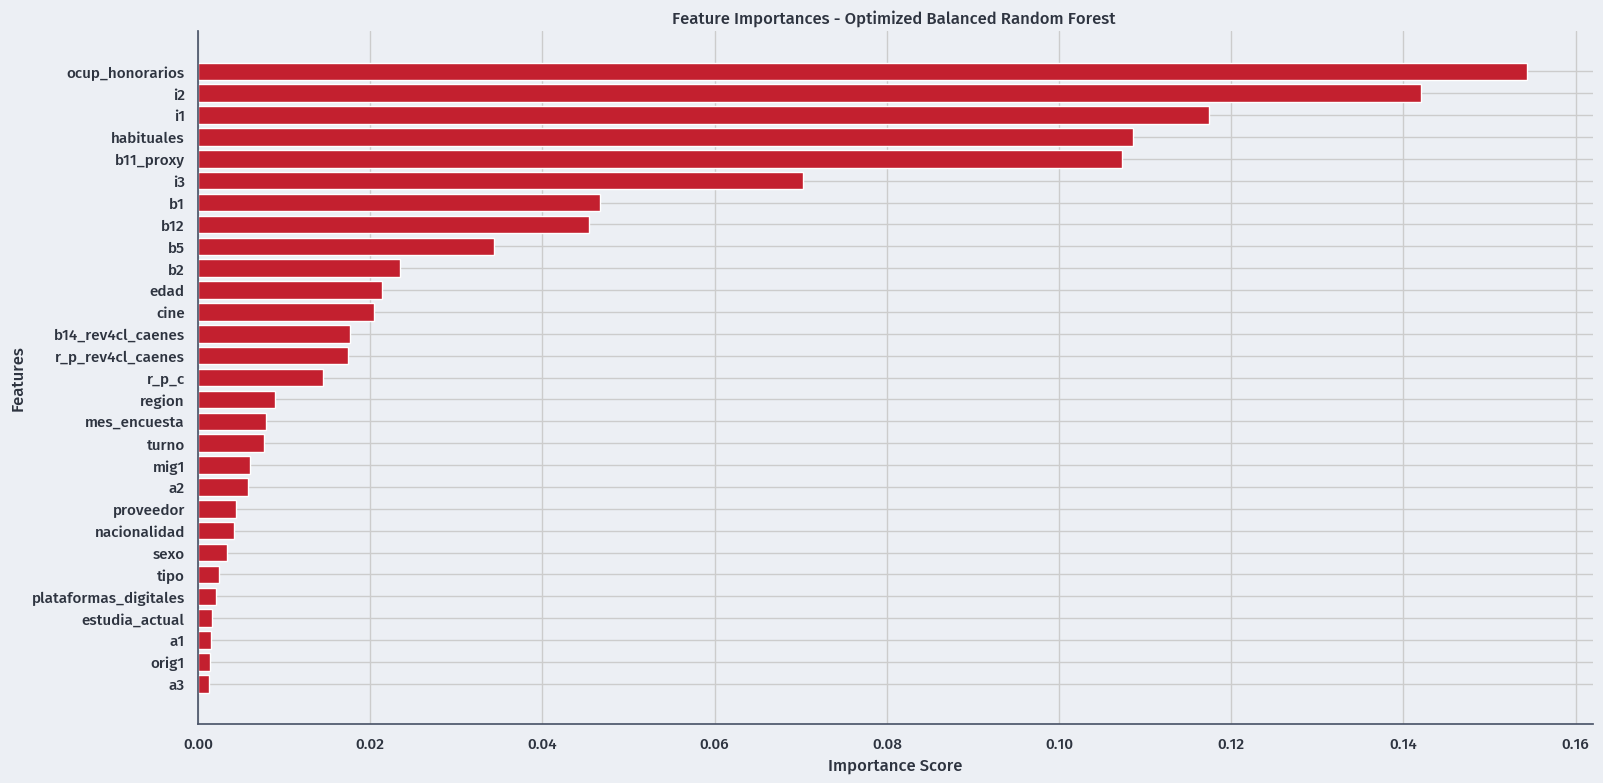

In [95]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importances = brf_optimized.feature_importances_
sorted_idx = feature_importances.argsort()

# Plot Feature Importance
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importances - Optimized Balanced Random Forest ")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [96]:
# Convert each dictionary to a DataFrame
df_BRFC = pd.DataFrame(metrics_BRFC)
df_XGB = pd.DataFrame(metrics_XGB)

# Combine both DataFrames
combined_metrics_df = pd.concat([df_BRFC, df_XGB], ignore_index=True)
combined_metrics_df

,Metric,Value
0,F1 Score BRFC,0.835580
1,Recall BRFC,0.894737
2,Precision BRFC,0.783760
3,F1 Score XGB,0.835986
4,Recall XGB,0.916216
5,Precision XGB,0.768675


C:\Users\nicot\AppData\Local\Temp\ipykernel_21184\1310165583.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\nicot\AppData\Local\Temp\ipykernel_21184\1310165583.py:7: UserWarning:


The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.



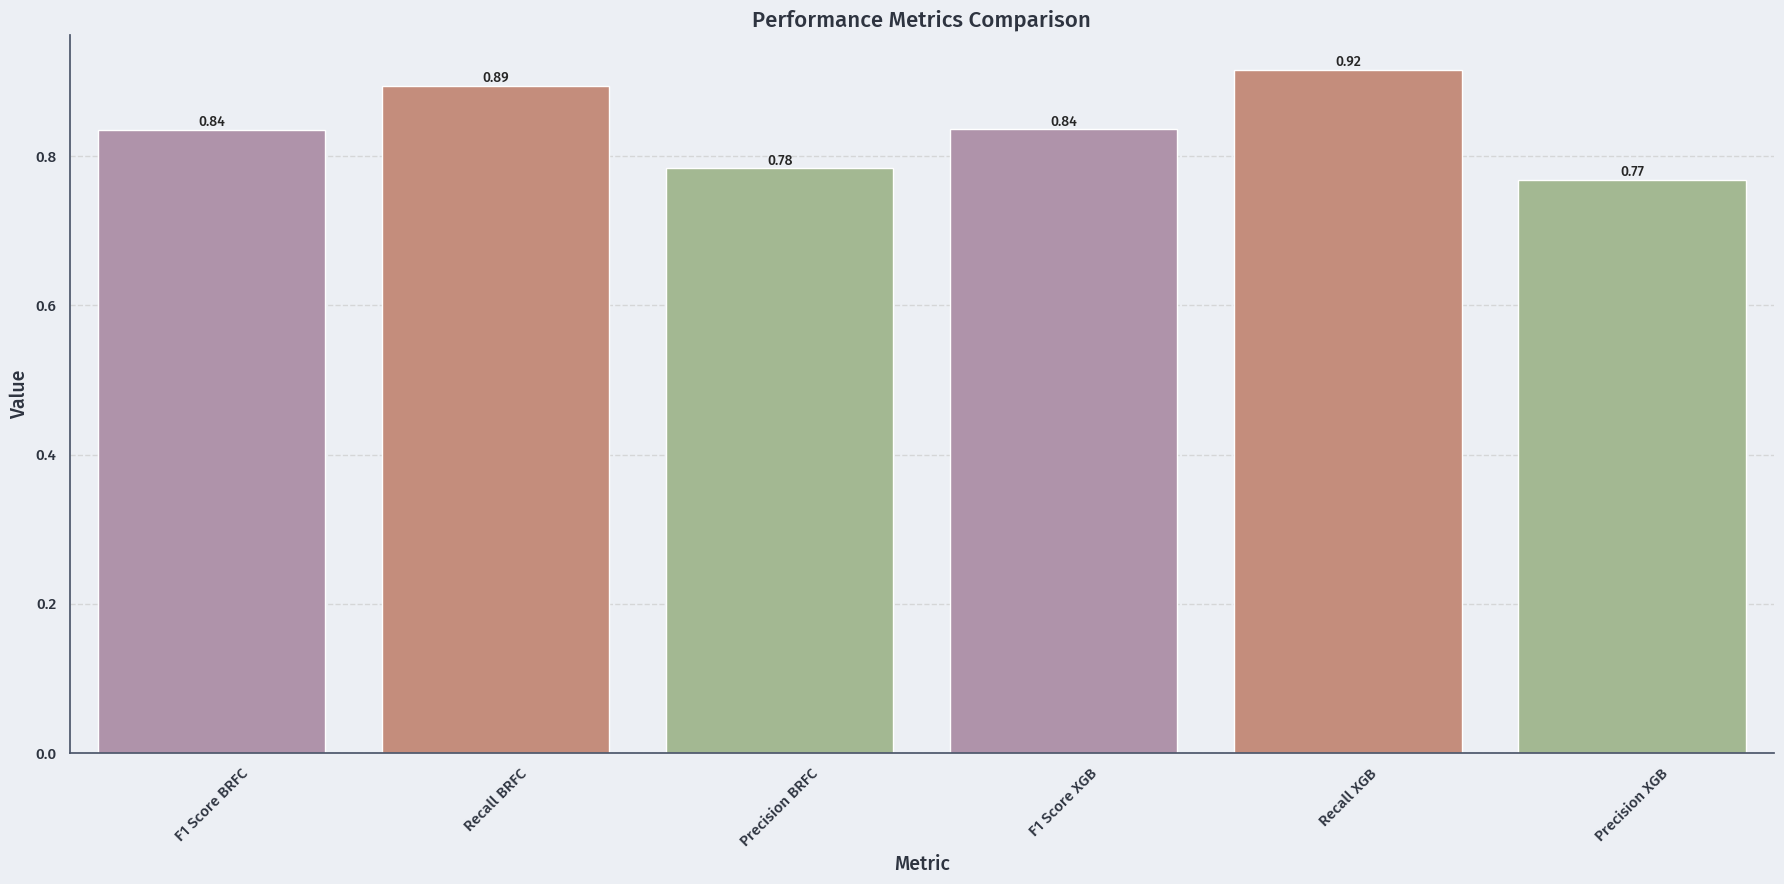

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

colors=['#B48EAD', "#d08770", "#A3BE8C" ]
# Create the bar plot
sns.barplot(data=combined_metrics_df, x="Metric", y="Value", palette=colors)

# Add value annotations on top of the bars
for index, row in combined_metrics_df.iterrows():
    plt.text(index, row['Value'] + 0.005, f"{row['Value']:.2f}", ha='center', fontsize=10)

# Customize the plot
plt.title("Performance Metrics Comparison", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.xlabel("Metric", fontsize=14)
#plt.ylim(0.8, 1.0)  # Adjust the y-axis range for better visibility
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# Curva precisión-sensibilidad

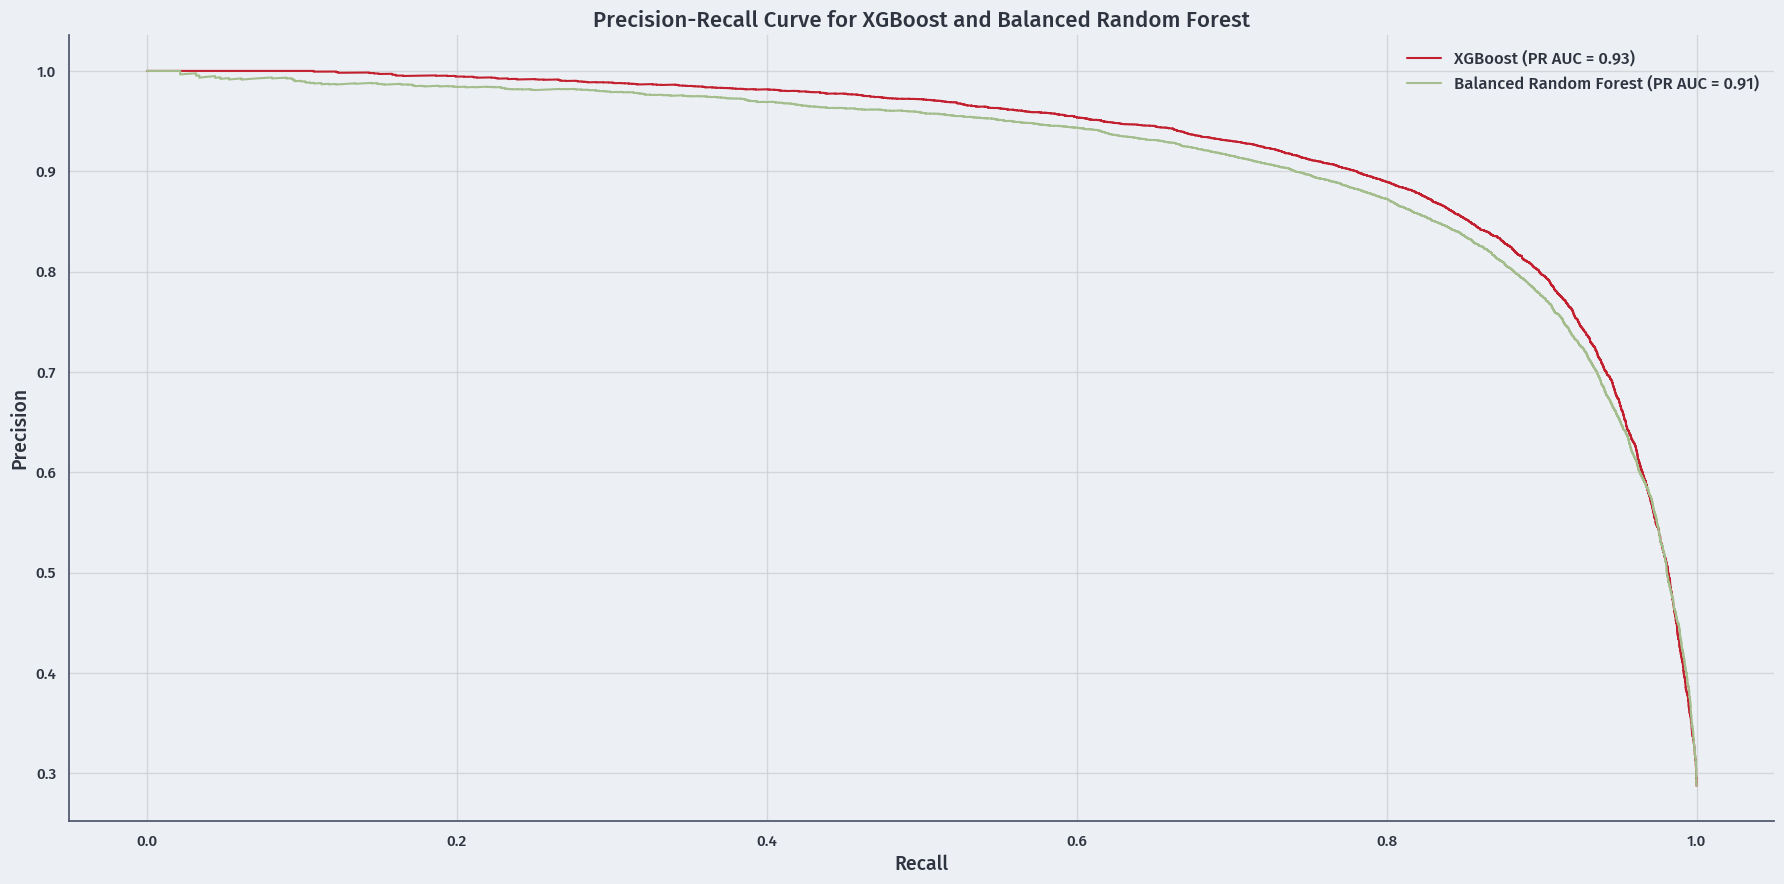

In [98]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Generate precision-recall data for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_prob_optimized_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

# Generate precision-recall data for Balanced Random Forest
precision_brf, recall_brf, _ = precision_recall_curve(y_test, y_prob_optimized_brfc)
pr_auc_brf = auc(recall_brf, precision_brf)

# Plot Precision-Recall curves
plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (PR AUC = {pr_auc_xgb:.2f})', color='#C3202F')
plt.plot(recall_brf, precision_brf, label=f'Balanced Random Forest (PR AUC = {pr_auc_brf:.2f})', color='#A3BE8C')

# Add labels, legend, and customizations
plt.title("Precision-Recall Curve for XGBoost and Balanced Random Forest", fontsize=16)
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.legend(loc="best", fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


# Conclusiones y propuestas de mejora

### Con diferencia, las preguntas que más permiten discriminar entre formal e informal son las siguientes:
<table>
  <tr>
    <th style="color: #ECEFF4;">Variable</th>
    <th style="color: #ECEFF4;">Descripción</th>
    <th style="color: #ECEFF4;">Categorías observadas</th>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7a_1</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema previsional o de pensión?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7a_2</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema de salud (público o privado)?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
    <tr>
    <td style="color: #ECEFF4;">b7a_3</td>
    <td style="color: #ECEFF4;">Su empleador, ¿cotiza por usted en el sistema de seguro de desempleo?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b8</td>
    <td style="color: #ECEFF4;">En ese empleo, ¿tiene contrato escrito?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b7b_2</td>
    <td style="color: #ECEFF4;">En este trabajo, ¿tiene derecho, aunque no utilice, a días pagados por enfermedad?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
    <tr>
    <td style="color: #ECEFF4;">b7b_3</td>
    <td style="color: #ECEFF4;">En este trabajo, ¿tiene derecho, aunque no lo utilice, a permiso por maternidad o paternidad?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>77 No aplica<br>88 No sabe<br>99 No responde</td>
  </tr>
</table>

### También, estas son importantes. Se aislaron de las anteriores para que los modelos de clasificación no estuvieran tan sesgados.
<table>
  <tr>
    <th style="color: #ECEFF4;">Variable</th>
    <th style="color: #ECEFF4;">Descripción</th>
    <th style="color: #ECEFF4;">Categorías observadas</th>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">ocup_honorarios</td>
    <td style="color: #ECEFF4;">Por el trabajo realizado, ¿entregó una boleta de honorarios?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>3 No sabe / No responde<br>77 No aplica</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">i2</td>
    <td style="color: #ECEFF4;">La empresa, negocio o institución que le paga su sueldo, ¿cuenta con los servicios de un contador o tiene oficina de contabilidad?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">i1</td>
    <td style="color: #ECEFF4;">La empresa, negocio o institución que le paga su sueldo, ¿está registrada en el Servicio de Impuestos Internos (SII) o tiene iniciación de actividades?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No sabe, pero la empresa entrega boleta o factura<br>3 No<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">habituales</td>
    <td style="color: #ECEFF4;">Actividad principal: Total horas semanales trabajadas habitualmente</td>
    <td style="color: #ECEFF4;">Valores numéricos</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b11_proxy</td>
    <td style="color: #ECEFF4;">¿El pago por su actividad principal fue a través de sueldo, salario o jornal?</td>
    <td style="color: #ECEFF4;">1 Sí<br>2 No<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">i3</td>
    <td style="color: #ECEFF4;">¿Cuál es el nombre de la empresa, negocio o institución que le paga su sueldo?</td>
    <td style="color: #ECEFF4;">1 Informante identifica nombre<br>2 El negocio no tiene nombre<br>3 Trabaja para un hogar particular<br>4 Otro asalariado<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b1</td>
    <td style="color: #ECEFF4;">Grupo de ocupación según CIUO-08</td>
    <td style="color: #ECEFF4;">Ver detalle en Anexo 3</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b12</td>
    <td style="color: #ECEFF4;">Está contratado o tiene un acuerdo de trabajo…</td>
    <td style="color: #ECEFF4;">1 Directamente con la empresa<br>2 Con un contratista<br>3 Con una empresa de servicios temporales<br>4 Con un enganchador<br>88 No sabe<br>99 No responde</td>
  </tr>
  <tr>
    <td style="color: #ECEFF4;">b5</td>
    <td style="color: #ECEFF4;">El negocio, empresa o institución donde trabajó la semana pasada era...</td>
    <td style="color: #ECEFF4;">1 Estatal<br>2 Privado<br>3 Hogar particular</td>
  </tr>
</table>